# Insurance Claims- Fraud Detection

Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 

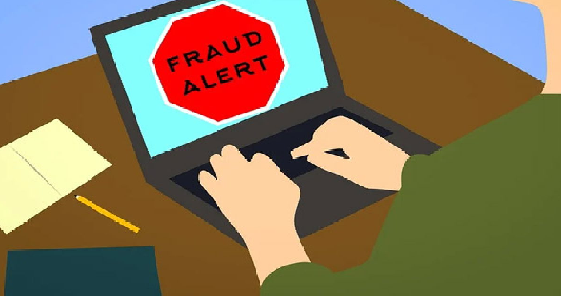

# Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore


import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [27]:
# Reading the csv file from dataset
data = pd.read_csv("Automobile_insurance_fraud.csv")
data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

he dataset contains the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

The dataset contains both categorical and numerical columns. Here "fraud_reported"is our traget column, since it has two categories so it termed to be "Classification Problem"where we need predict if an insurance claim is fraudulent or not.

# Exploratory Data Analysis (EDA)

In [28]:
# Checking dimension of dataset
data.shape

(1000, 40)

The dataset contains 1000 rows and 40 columns. Out of40 columns 39 are independent columns and remaining one is our target variable "fraud_reported".

In [29]:
#View summary of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Observation

We can see that the dataset contains mixture of categorical and numerical variables.

21 features are categorical and 19 are numerical. Our target variable is categorical.

Here the column _c39 has 0 non null values which means it has one unique values throughout the data so we can drop this column.


In [30]:
# Dropping _c39 column
data.drop("_c39",axis=1,inplace=True)

In [31]:
#Also check any duplicate records are present 
data.drop_duplicates(inplace=True)

In [32]:
data.shape

(1000, 39)

That means no duplicate records were present in our data

In [33]:
# From info we can notice no null values present, let us again confirm the same
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

From this we can confirm that no null values present in our system

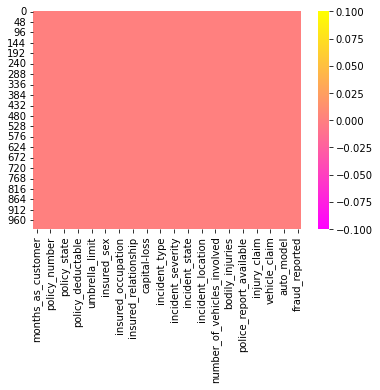

In [34]:
# Let's visualize the null values clearly
sns.heatmap(data.isnull(), cmap="spring")
plt.show()

In [35]:
#Let us check unique values of our data set
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Policy number and incident location are unique features and having different values for each record, so will not have any impact on the machine learning hence we will drop that column

In [36]:
#droping policynumber and Incident_location
data.drop(['incident_location','policy_number'],axis=1,inplace=True)

# Data Preprocessing

Let's check the list of value counts in each columns to find if there are any unexpected or corrupted entries in the dataset


In [37]:
# Checking the value counts of each columns
for i in data.columns:
        print(data[i].value_counts())
        print('*'*100)

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
****************************************************************************************************
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
****************************************************************************************************
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 9

So we have '?' in some features that we have to clear using Imputation Techniques, In Police_report,coliision Type and Vehicle Damage

Insured_zip looks like some code for policy, and 995 unique values, and only few repeatation, so we can remove that also, from or data

In [38]:
# Dropping insured_zip column as it is not important for the prediction
data.drop('insured_zip',axis=1,inplace=True)

In [39]:
# we will replace '?' with nan 
data.replace('?',np.NaN,inplace=True)

In [40]:
# NOw again check nan counts in our data
data.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount  

Now we have to use imputaion techniques to replace the this nan

Let check mode of the collision_type,property_damage,Police_report_available

In [41]:
# printing mode of the above columns
print("The mode of collision_type is:",data["collision_type"].mode())
print("The mode of property_damage is:",data["property_damage"].mode())
print("The mode of police_report_available is:",data["police_report_available"].mode())

The mode of collision_type is: 0    Rear Collision
dtype: object
The mode of property_damage is: 0    NO
dtype: object
The mode of police_report_available is: 0    NO
dtype: object


So we will impute with Mode in these coloumns as all these are catagorical columns

In [50]:
#We will use mode method to fill this Nan values.

data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [52]:
data.isna().sum()# checking any null values are present or not

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

In [53]:
# change to datetime in ploicy_blind_date
data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'])
data['Month'] = pd.DatetimeIndex(data['policy_bind_date']).month
data['Year'] = pd.DatetimeIndex(data['policy_bind_date']).year
data['Day'] = data['policy_bind_date'].dt.day

In [54]:
# drop policy_bind_date column
data.drop(['policy_bind_date'],axis=1,inplace=True)
data

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation  ... injury_claim  \
0                        MD       craft-repair  ...         6510   
1                        MD  machine-op-inspct  ...          780   
2                       PhD              sales  ...         7700   
3                       PhD       armed-forces  ...         6340   
4                 Associate              sales  ...         1300   
..                      ...                ...  ...          ...   
995                 Masters       craft-repair  ...        17440   
996                     PhD     prof-specialty  ...        18080   
997                 Masters       armed-forces  ...         7500   
998               Associate  handlers-cleaners  ...         5220   
999               Associate              sales  ...          460   

    property_claim  vehicle_claim   auto_make auto_model auto_year  \
0            13020          52080        Saab        92x      2004   
1              780           3510    Mercedes       E400      2007   
2             3850          23100       Dodge        RAM      2007   
3             6340          50720   Chevrolet      Tahoe      2014   
4              650           4550      Accura        RSX      2009   
..             ...            ...         ...        ...       ...   
995           8720          61040       Honda     Accord      2006   
996          18080          72320  Volkswagen     Passat      2015   
997           7500          52500      Suburu    Impreza      1996   
998           5220          36540        Audi         A5      1998   
999            920           3680    Mercedes       E400      2007   

    fraud_reported Month  Year Day  
0                Y    10  2014  17  
1                Y     6  2006  27  
2                N     6  2000   9  
3                Y     5  1990  25  
4                N     6  2014   6  
..             ...   ...   ...  ..  
995              N     7  1991  16  
996              N     5  2014   1  
997              N     2  2003  17  
998              N    11  2011  18  
999              N    11  1996  11  

[1000 rows x 38 columns]

In [55]:
# change to datetime in incidentdate
data['incident_date']=pd.to_datetime(data['incident_date'])
data['Incident_Month'] = pd.DatetimeIndex(data['incident_date']).month
data['Incident_Year'] = pd.DatetimeIndex(data['incident_date']).year
data['Incident_Day'] = data['incident_date'].dt.day

In [137]:
# Now we can drop incident_date
data.drop('incident_date',axis=1,inplace=True)

In [56]:
# Let's extract age of the vehicle from auto_year by subtracting it from incident_year
data["Vehicle_Age"] = data['Incident_Year'] - data["auto_year"]
data['Vehicle_Age'].value_counts()

20    56
16    55
10    54
9     53
4     53
8     52
12    51
6     50
5     50
2     49
13    49
0     47
18    46
3     46
7     45
1     44
14    42
15    42
17    40
11    39
19    37
Name: Vehicle_Age, dtype: int64

So we obtained the age of Vehicles, That will help us to find the claim amount,

In [57]:
# So remove Auto Year from data
data.drop('auto_year',axis=1,inplace=True)

# Description of Dataset

In [58]:
# Statistical summary of numerical columns
data.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

       ...  injury_claim  property_claim  vehicle_claim        Month  \
count  ...   1000.000000     1000.000000    1000.000000  1000.000000   
mean   ...   7433.420000     7399.570000   37928.950000     6.559000   
std    ...   4880.951853     4824.726179   18886.252893     3.391758   
min    ...      0.000000        0.000000      70.000000     1.000000   
25%    ...   4295.000000     4445.000000   30292.500000     4.000000   
50%    ...   6775.000000     6750.000000   42100.000000     7.000000   
75%    ...  11305.000000    10885.000000   50822.500000     9.000000   
max    ...  21450.000000    23670.000000   79560.000000    12.000000   

              Year          Day  Incident_Month  Incident_Year  Incident_Day  \
count  1000.000000  1000.000000     1000.000000         1000.0    1000.00000   
mean   2001.604000    15.448000        3.407000         2015.0      13.08400   
std       7.360391     8.850176        3.276291            0.0      10.44318   
min    1990.000000     1.000000        1.000000         2015.0       1.00000   
25%    1995.000000     8.000000        1.000000         2015.0       2.00000   
50%    2002.000000    16.000000        2.000000         2015.0      15.00000   
75%    2008.000000    23.000000        5.000000         2015.0      22.00000   
max    2015.000000    31.000000       12.000000         2015.0      31.00000   

       Vehicle_Age  
count  1000.000000  
mean      9.897000  
std       6.015861  
min       0.000000  
25%       5.000000  
50%      10.000000  
75%      15.000000  
max      20.000000  

[8 rows x 22 columns]

Observation:

* All incident year is 2015, that means this data is of year 2015,
* Minimum age of the customer is 19 and max is 64
* Customer who has claimed insurance is maximum 479 months old customer, some new customers also claimed
* Minimum claim amount given is 100 and maximum is 114920
* We have minimum of 1 witnesses and max 3.
* Vehicle claim is minimum 70 and maximum is 79560
* Maximum age of Car is 20 years and minimum year was 0, that means new cars, 


# Data Visualization

Separating Catagorical and Numirical columns

In [139]:
# Checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Now checking for numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)

Categorical columns are:
 ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical columns are:
 ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Month', 'Year', 'Day', 'Incident_Month', 'Incident_Year', 'Incident_Day', 'Vehicle_Age']


# Univariate Analysis

Plotting categorical columns

N    753
Y    247
Name: fraud_reported, dtype: int64


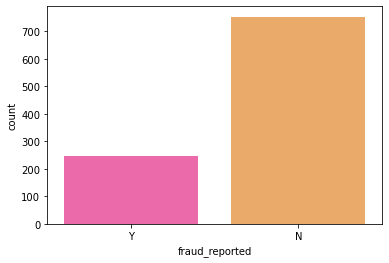

In [62]:
#Visualizing how many insurance claims is fraudulent
print(data["fraud_reported"].value_counts())
sns.countplot(data["fraud_reported"],palette="spring")
plt.show()

From this we can notice that our label is Imbalanced, so we will use SMOT to make it balanced, 
from this most of the claims were True claims, but about 30% claims were frouds and that will defenitly ceate huge loss for the company

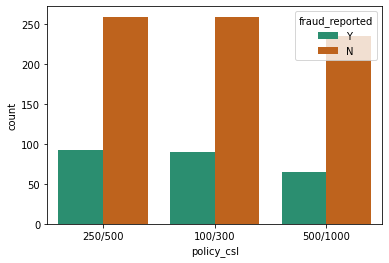

In [63]:
#Visualizing policy_csl count with hue fraud_reported
sns.countplot(data["policy_csl"],palette="Dark2",hue=data['fraud_reported'])
plt.show()

All three type Frauds percentage is almost same

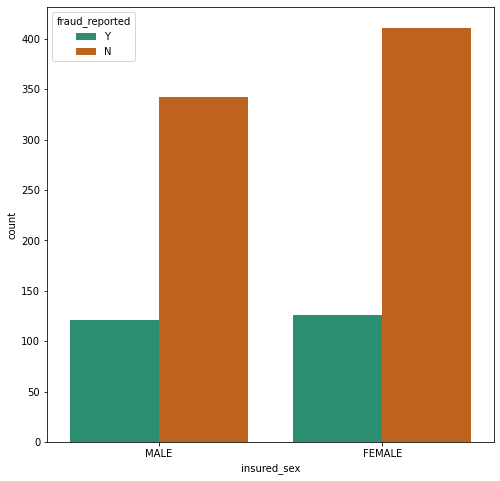

In [65]:
#Visualizing insured sex count with hue fraud_reported
plt.figure(figsize=(8,8))
sns.countplot(data["insured_sex"],palette="Dark2",hue=data['fraud_reported'])
plt.show()

From this data Female number were high ,but percentage of male doing froud is slightly higher than female,

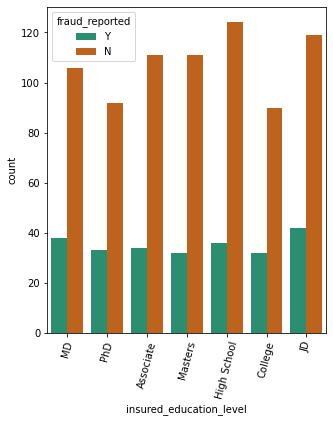

In [70]:
#Visualizing insured education level count with hue fraud_reported
plt.figure(figsize=(5,6))
sns.countplot(data["insured_education_level"],palette="Dark2",hue=data['fraud_reported'])
plt.xticks(rotation=75)
plt.show()

Maximum number of applicants were from High School level, Inall case about 40 numbers were frauds

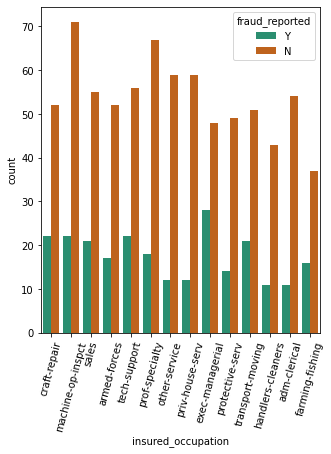

In [71]:
#Visualizing occupation count with hue fraud_reported
plt.figure(figsize=(5,6))
sns.countplot(data["insured_occupation"],palette="Dark2",hue=data['fraud_reported'])
plt.xticks(rotation=75)
plt.show()

From this we can notice that all occupation type people are appliying for insurance claims , maximum application from Machine_op_inspection, as they know any damage easily, BUT percentage of frauds comparetevily high in private_house_service area

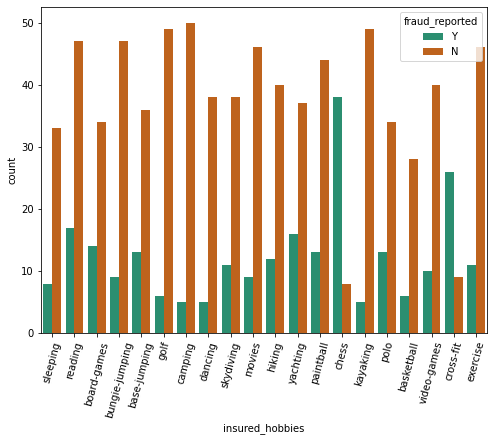

In [73]:
#Visualizing insured_hobbies count with hue fraud_reported
plt.figure(figsize=(8,6))
sns.countplot(data["insured_hobbies"],palette="Dark2",hue=data['fraud_reported'])
plt.xticks(rotation=75)
plt.show()

From this we can identify that people with hobbies  chess and cross _fit have maximum number of frauds, there froud rate is much higher than their non fraud rate,

Lowest froaud rate is for gold,camping, dancing and kayaking peoples

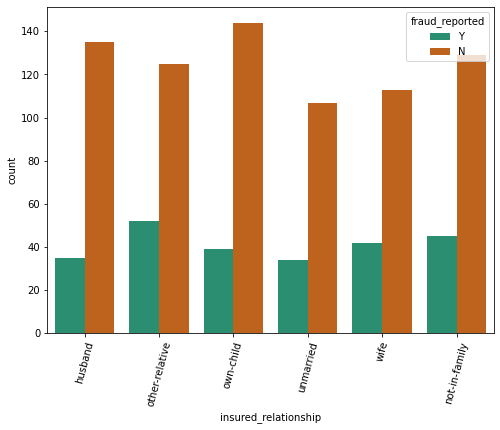

In [74]:
#Visualizing insured_relationship count with hue fraud_reported
plt.figure(figsize=(8,6))
sns.countplot(data["insured_relationship"],palette="Dark2",hue=data['fraud_reported'])
plt.xticks(rotation=75)
plt.show()

There is not much diffarance in these relations, comparetevily high frauds conducted by other-relatives

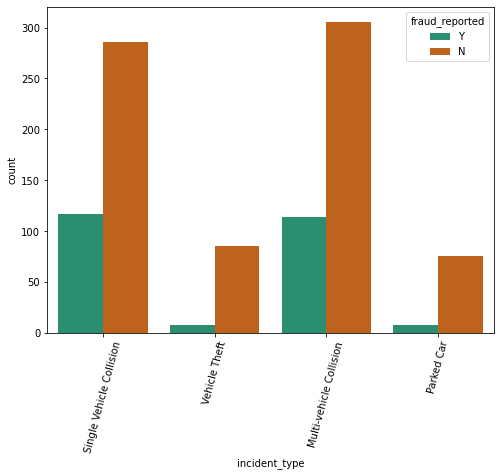

In [75]:

#Visualizing incident_type count with hue fraud_reported
plt.figure(figsize=(8,6))
sns.countplot(data["incident_type"],palette="Dark2",hue=data['fraud_reported'])
plt.xticks(rotation=75)
plt.show()

Single vahicle collision and Multi_VehicleCollision were high in numbers, having same number of frauds. parked cars and Vehicle Theft are very minimum numbers

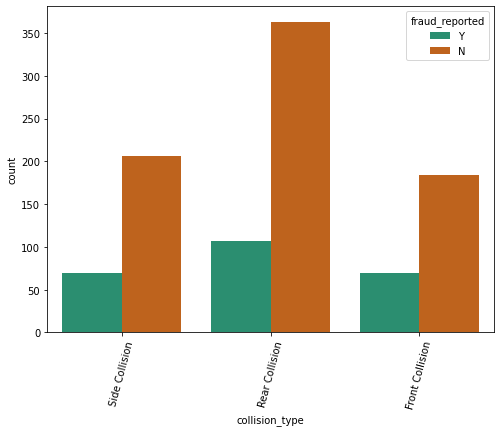

In [76]:
#Visualizing collision_type count with hue fraud_reported
plt.figure(figsize=(8,6))
sns.countplot(data["collision_type"],palette="Dark2",hue=data['fraud_reported'])
plt.xticks(rotation=75)
plt.show()

Rear Collision is high compared to other two type, side collision and frontcollision, but percetage of fraods high in these two.

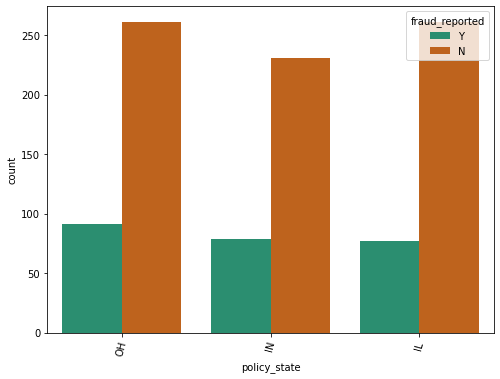

In [109]:
#Visualizing policy_state count with hue fraud_reported
plt.figure(figsize=(8,6))
sns.countplot(data["policy_state"],palette="Dark2",hue=data['fraud_reported'])
plt.xticks(rotation=75)
plt.show()

Maximum numbe of policies are from OH, other two state the number of policy is same, percentage of claim raton is same fo all

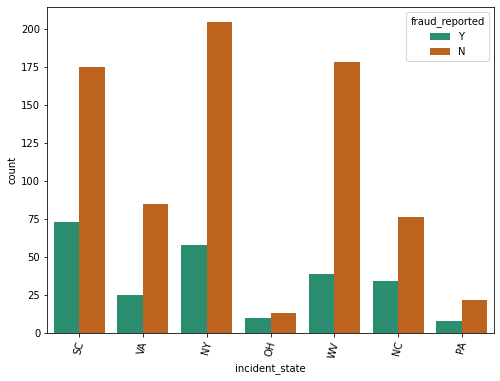

In [77]:
#Visualizing incident_state count with hue fraud_reported
plt.figure(figsize=(8,6))
sns.countplot(data["incident_state"],palette="Dark2",hue=data['fraud_reported'])
plt.xticks(rotation=75)
plt.show()

Maximum number of frauds were happening in NY state(New York),followed by WV and SC.

But in OH about 90 % claims were frauds

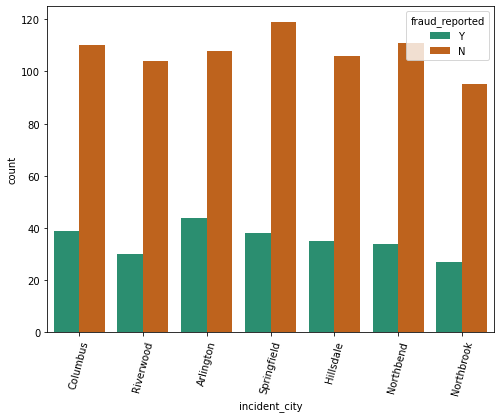

In [78]:
#Visualizing incident_city count with hue fraud_reported
plt.figure(figsize=(8,6))
sns.countplot(data["incident_city"],palette="Dark2",hue=data['fraud_reported'])
plt.xticks(rotation=75)
plt.show()

While looking into city all cities were look like same

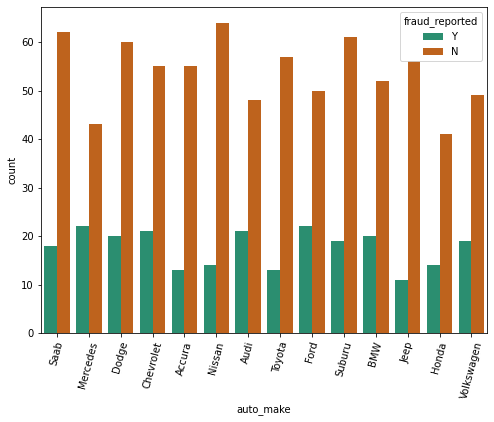

In [80]:
#Visualizing auto_make count with hue fraud_reported
plt.figure(figsize=(8,6))
sns.countplot(data["auto_make"],palette="Dark2",hue=data['fraud_reported'])
plt.xticks(rotation=75)
plt.show()

From this we can notice almost all make have similar number of cases

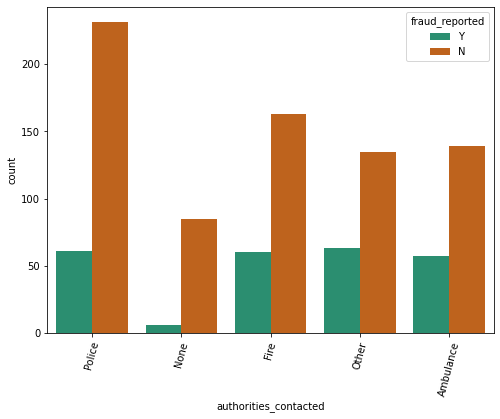

In [81]:
#Visualizing authorities_contacted count with hue fraud_reported
plt.figure(figsize=(8,6))
sns.countplot(data["authorities_contacted"],palette="Dark2",hue=data['fraud_reported'])
plt.xticks(rotation=75)
plt.show()

From this we can identify that even police reported cases have frauds,
* Number of frauds in all cases were almost same except were not reported anywhere. 
* The Cases were no report available were mostly genuine

# Now we can plot Bivarient and Numerical Polts

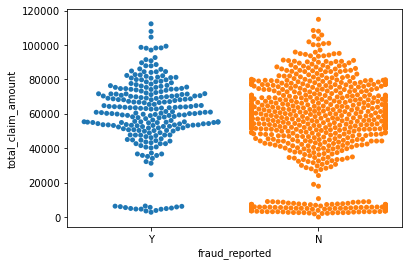

In [134]:
sns.swarmplot(data['fraud_reported'],data['total_claim_amount'])
plt.show()

As we noticed the fraud cases are high when chaim amount is high

In [82]:
numerical_col

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'Month',
 'Year',
 'Day',
 'Incident_Month',
 'Incident_Year',
 'Incident_Day',
 'Vehicle_Age']

As there are high number of coloumns we can plot pair plot first

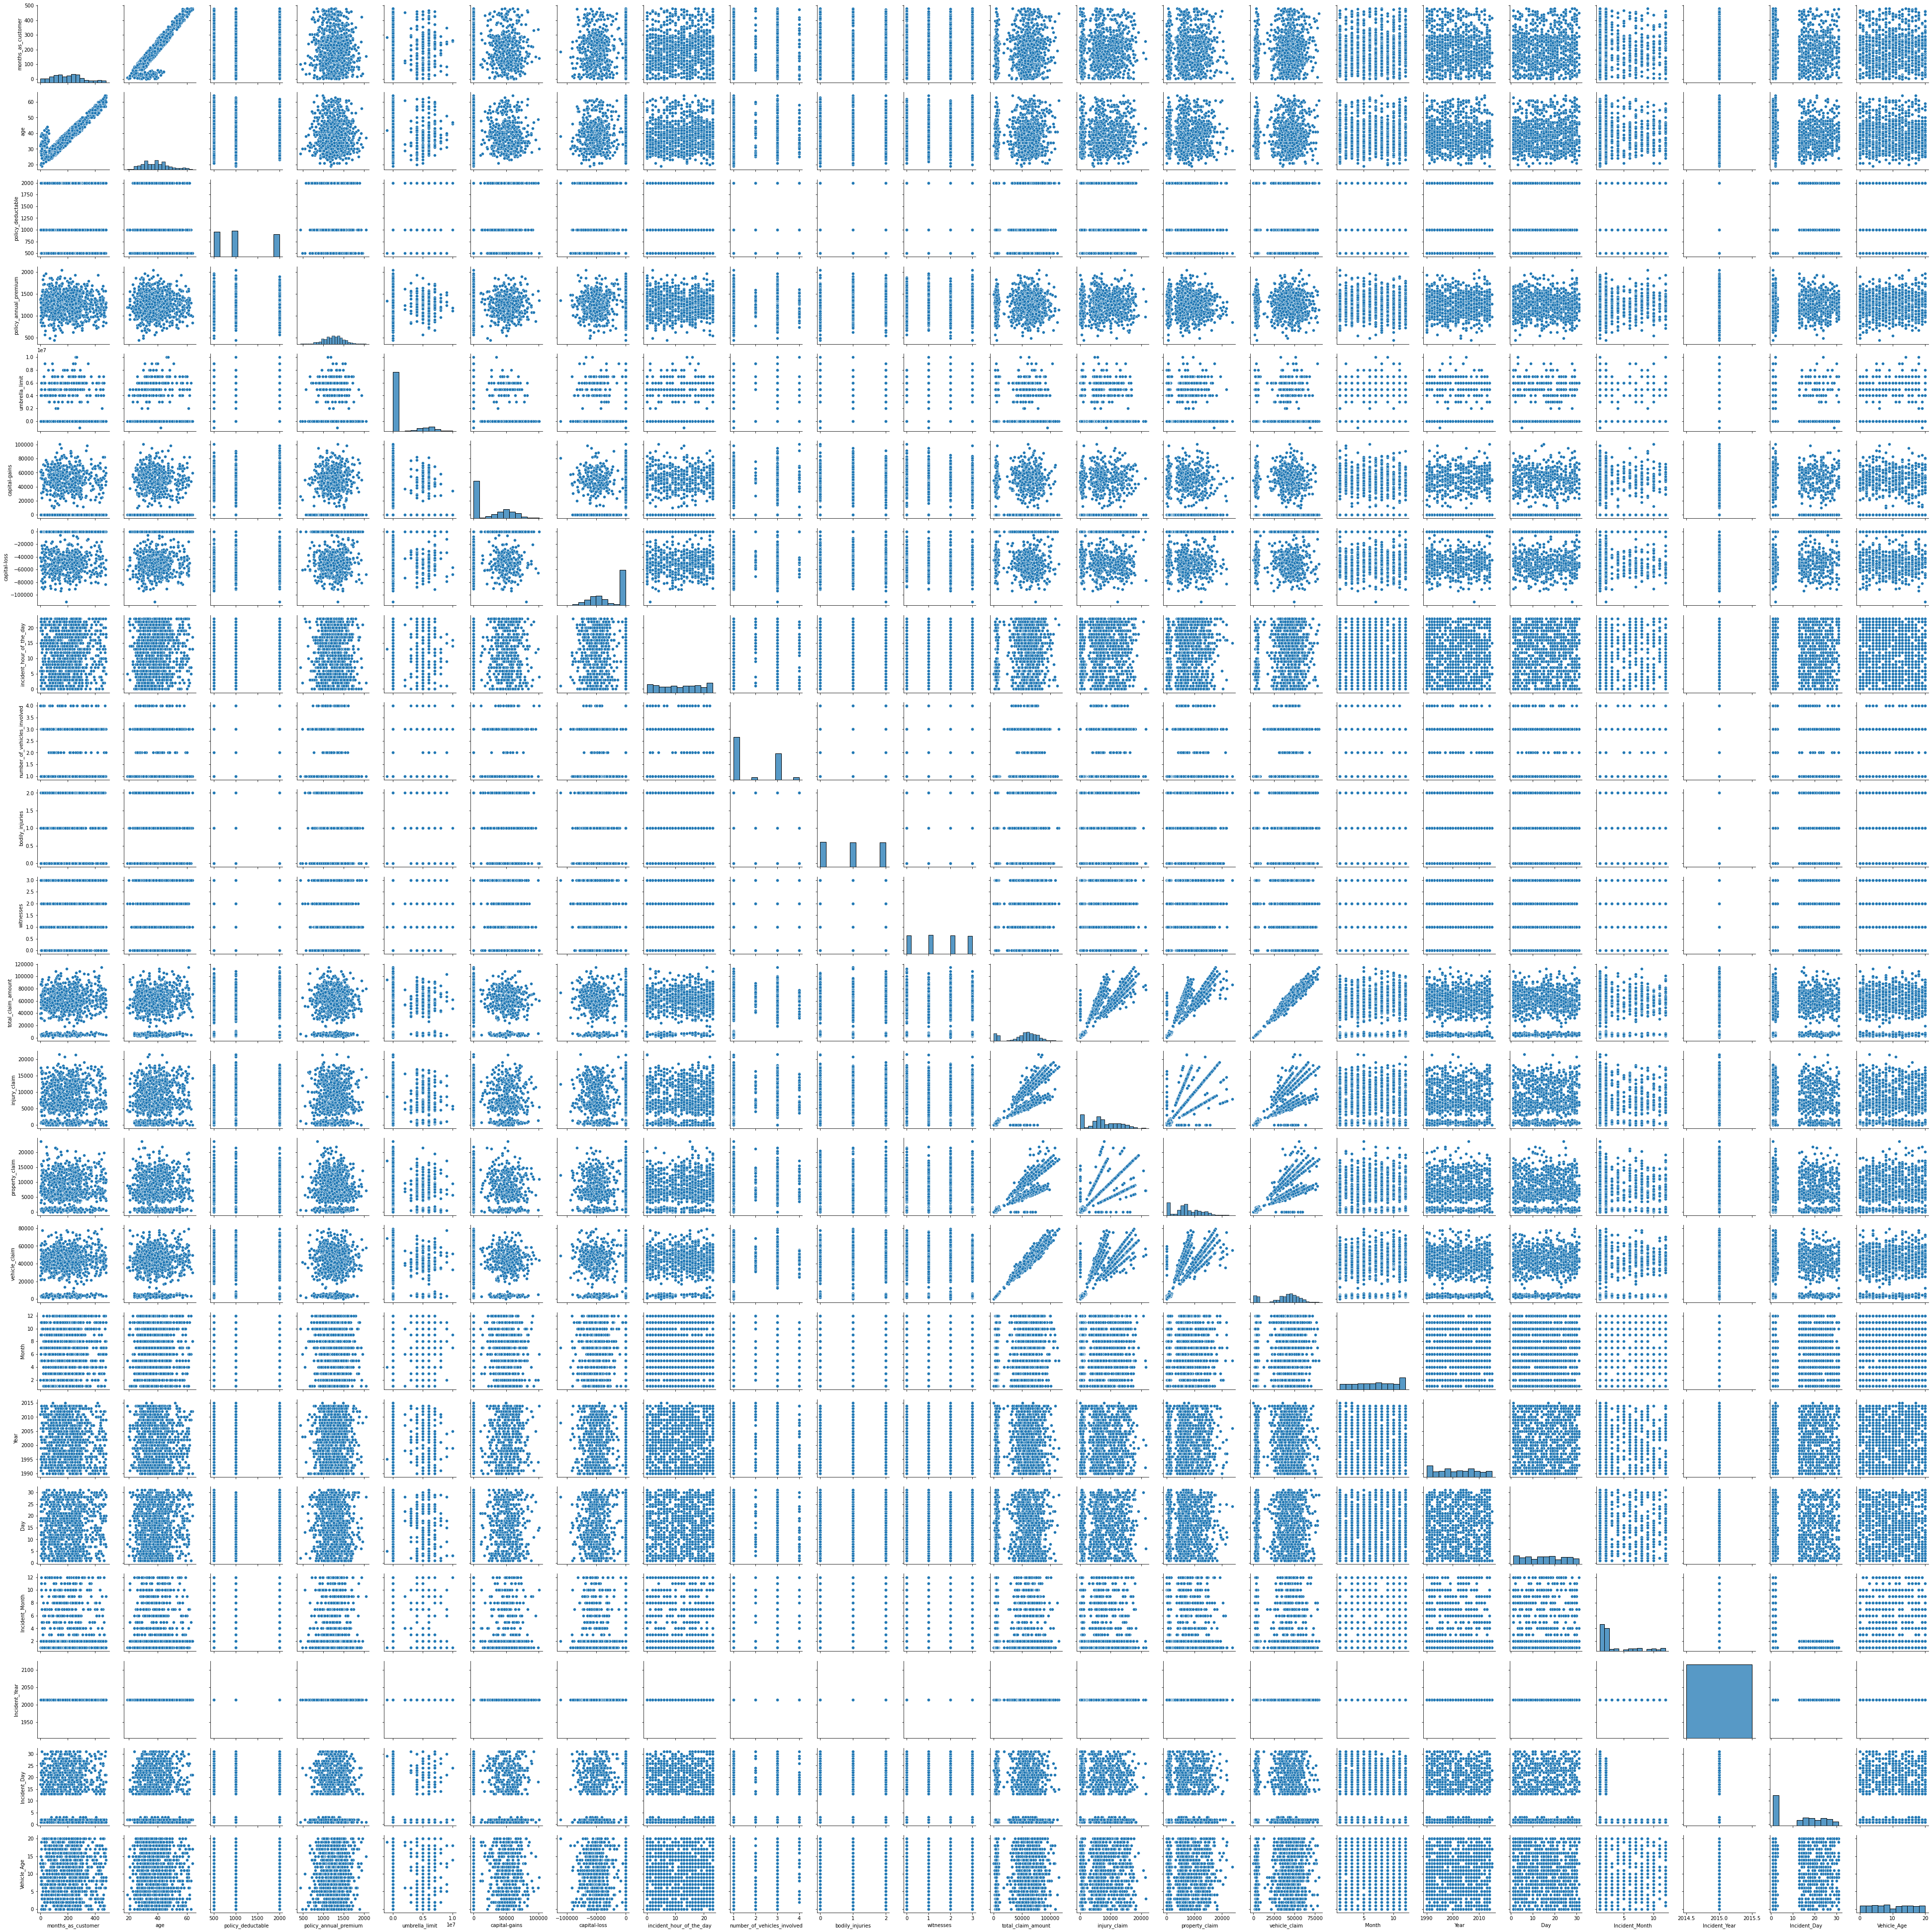

In [87]:
sns.pairplot(data)
plt.yticks(rotation=75)
plt.show()

From this we can notice some features have high liear relation between them, We can plot them

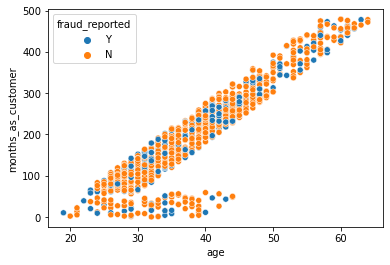

In [86]:
# Relaion between Age and months_as_customer
sns.scatterplot(x='age',y='months_as_customer',data=data,hue='fraud_reported')
plt.show()

From this we can notice that there is a clear linear relation between them, Frauds are present in amost all ages and alos in old alwell as new customers too

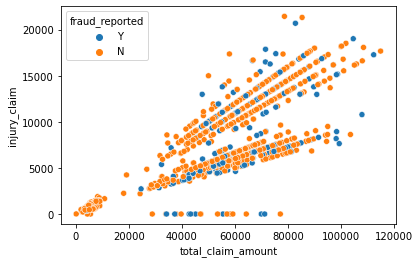

In [88]:
# Relaion between total_claim_amount and injury_claim
sns.scatterplot(x='total_claim_amount',y='injury_claim',data=data,hue='fraud_reported')
plt.show()

For small amounts frauds were low, but as amount increases chance of fraud is also incresing

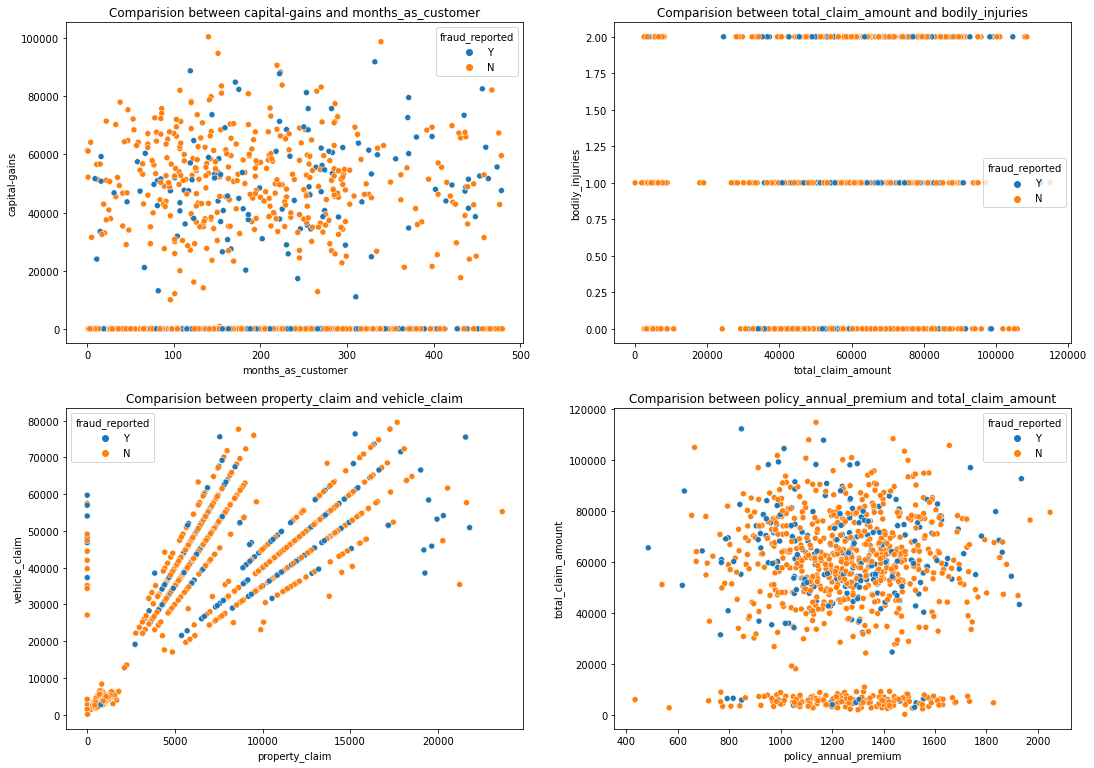

In [91]:
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparision between capital-gains and months_as_customer')
sns.scatterplot(data['months_as_customer'],data['capital-gains'],hue=data['fraud_reported'])

plt.subplot(2,2,2)
plt.title('Comparision between total_claim_amount and bodily_injuries')
sns.scatterplot(data['total_claim_amount'],data['bodily_injuries'],hue=data['fraud_reported'])

plt.subplot(2,2,3)
plt.title('Comparision between property_claim and vehicle_claim')
sns.scatterplot(data['property_claim'],data['vehicle_claim'],hue=data['fraud_reported'])

plt.subplot(2,2,4)
plt.title('Comparision between policy_annual_premium and total_claim_amount')
sns.scatterplot(data['policy_annual_premium'],data['total_claim_amount'],hue=data['fraud_reported'])
plt.show()

* Fig-1 No that much relation between capital gains and months as customer
* in fig two also not that much relation, even one one injury different amount claimed
* For vehicle claim and property claim there is a highy linear relation
* Claim amount and Toatl calim also no clear linear relation

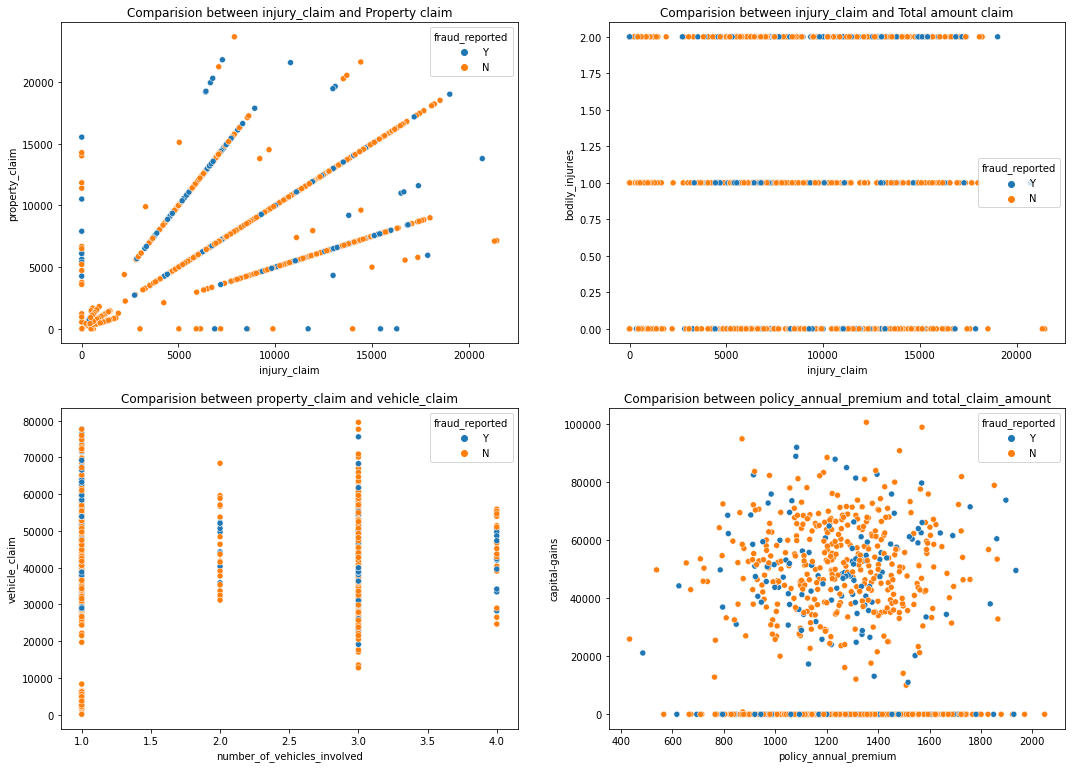

In [151]:
#Plot Injury Claim Property Claim,
plt.figure(figsize=[18,13])
plt.subplot(2,2,1)
plt.title('Comparision between injury_claim and Property claim')
sns.scatterplot(data['injury_claim'],data['property_claim'],hue=data['fraud_reported'])

plt.subplot(2,2,2)
plt.title('Comparision between injury_claim and Total amount claim')
sns.scatterplot(data['injury_claim'],data['bodily_injuries'],hue=data['fraud_reported'])

plt.subplot(2,2,3)
plt.title('Comparision between property_claim and vehicle_claim')
sns.scatterplot(data['number_of_vehicles_involved'],data['vehicle_claim'],hue=data['fraud_reported'])

plt.subplot(2,2,4)
plt.title('Comparision between policy_annual_premium and total_claim_amount')
sns.scatterplot(data['policy_annual_premium'],data['capital-gains'],hue=data['fraud_reported'])
plt.show()

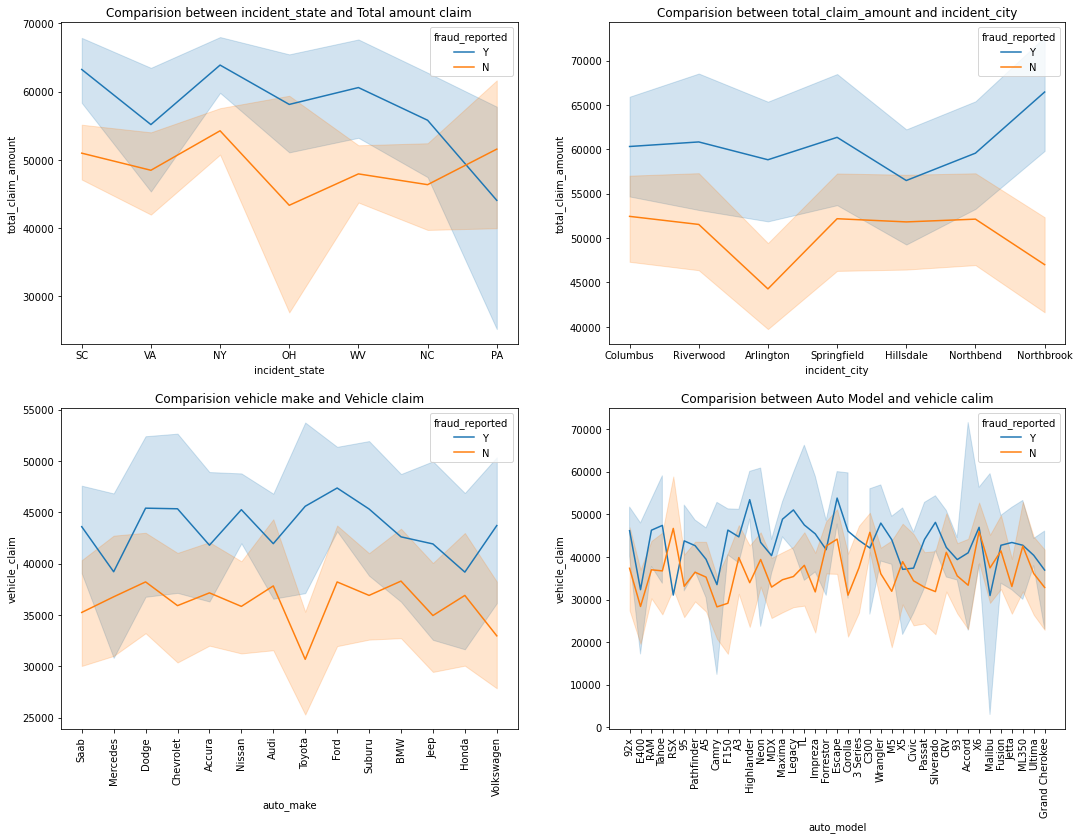

In [106]:
#Let us plot relation between state,city,model, and make
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparision between incident_state and Total amount claim')
sns.lineplot(data['incident_state'],data['total_claim_amount'],hue=data['fraud_reported'])

plt.subplot(2,2,2)
plt.title('Comparision between total_claim_amount and incident_city')
sns.lineplot(data['incident_city'],data['total_claim_amount'],hue=data['fraud_reported'])

plt.subplot(2,2,3)
plt.xticks(rotation=90)
plt.title('Comparision vehicle make and Vehicle claim')
sns.lineplot(data['auto_make'],data['vehicle_claim'],hue=data['fraud_reported'])

plt.subplot(2,2,4)
plt.xticks(rotation=90)
plt.title('Comparision between Auto Model and vehicle calim')
sns.lineplot(data['auto_model'],data['vehicle_claim'],hue=data['fraud_reported'])
plt.show()

From this we can find out
* Almost all state if the  claim amount is high then chances of fraud is also high except PA
* Same in case of city high claim amount chance of fraud is high
* Auto Make, Mercedes and Honda , chnces of fraud is low even if claim amount is high


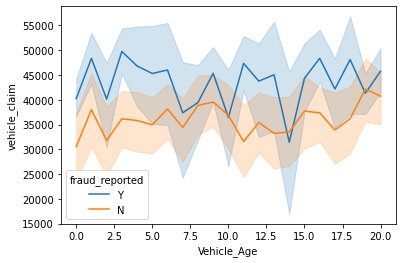

In [107]:
#let us plot vehicle age and vehicle claim amount
sns.lineplot(data['Vehicle_Age'],data['vehicle_claim'],hue=data['fraud_reported'])
plt.show()

old vehicle have maximum claim amount.
vehicle around age of 13 to 15 hav less chances of frauds. For new vehicles high claim means high probability of frauds

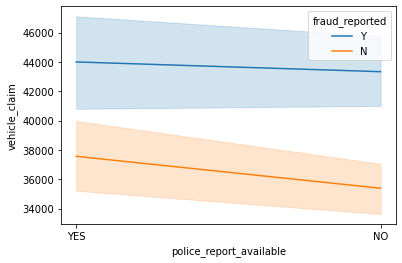

In [110]:
#let us plot vehicle age and vehicle claim amount
sns.lineplot(data['police_report_available'],data['vehicle_claim'],hue=data['fraud_reported'])
plt.show()

If police report is awailable then normaly the lower amounts claimed were Genuine
.As we noticed here alos if claim amount is high chanced of fraud is also high

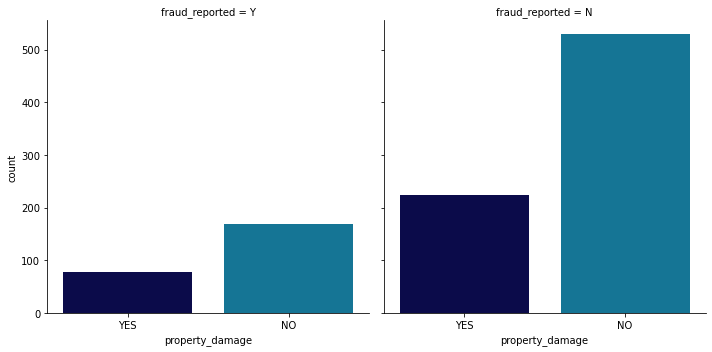

In [118]:
# Comparing property_damage and fraud_reported
sns.factorplot('property_damage',kind='count',data=data,col='fraud_reported',palette="ocean")
plt.show()

Customers who does not have any property for them high chances of frauds

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

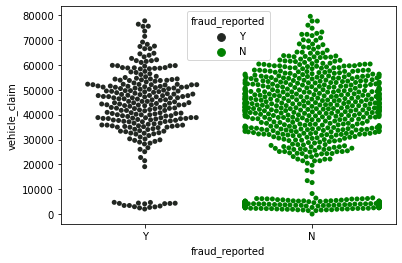

In [132]:
# Comparing insured_sex and age
sns.swarmplot(x='fraud_reported',y='vehicle_claim',data=data,color="g",hue='fraud_reported')

For fraud detection the vehicle claim is high

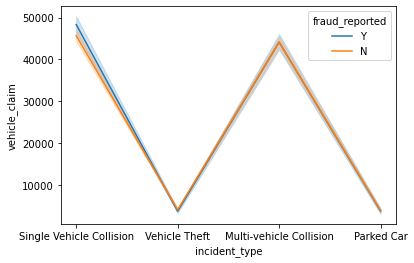

In [122]:
# Comparing incident_type and vehicle claim
sns.lineplot(data['incident_type'],data['vehicle_claim'],hue=data['fraud_reported'])
plt.show()

For single claim claimed and multi-vehicle collision cvehicle claim is high, for vehicle theft and Parked Car,claimed amount is low, may be because we noticed earlier that the Vehicle left and Parked car fraud rate is low.

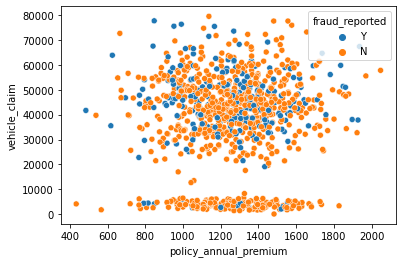

In [124]:
# Comparing Policy_annula_Premium and vehicle claim
sns.scatterplot(data['policy_annual_premium'],data['vehicle_claim'],hue=data['fraud_reported'])
plt.show()

Similar to Total_amount_claim, Vehicle Claim also not have any linear relation with policy anual premium

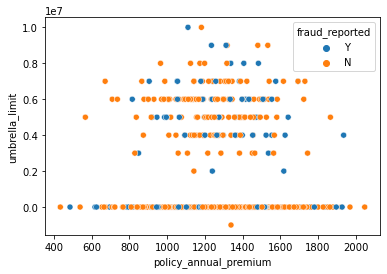

In [128]:
# Comparing Policy_annula_Premium and vehicle claim
sns.scatterplot(data['policy_annual_premium'],data['umbrella_limit'],hue=data['fraud_reported'])
plt.show()

As we know most the values have zero umbralla limit, and for high values more frauds chaces

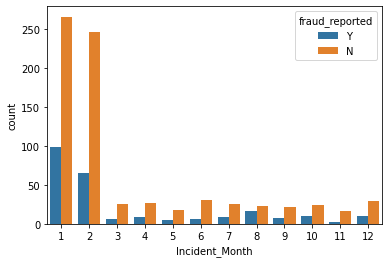

In [135]:
sns.countplot(data['Incident_Month'],hue=data['fraud_reported'])
plt.show()

Most inceident took placed in Jan and Feb

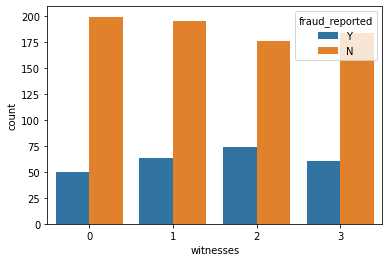

In [153]:
sns.countplot(data['witnesses'],hue=data['fraud_reported'])
plt.show()

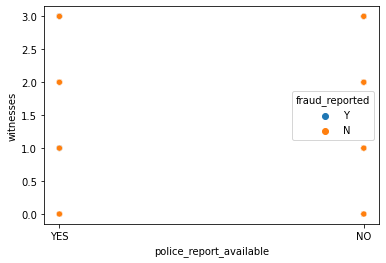

In [154]:
# Comparing Police Report And  witnesses
sns.scatterplot(data['police_report_available'],data['witnesses'],hue=data['fraud_reported'])
plt.show()

Police reort with witness were frauds are not seen

# Conclusion
* Some feature exibits mulicoliearity
* Frauds rate are high when vehicle claim or Total claim is high
* Having umbrella unit of 2000000 increases the chance of Insurance fraud.
* Most of the claimers with hobies Chess and crossfit  is fraud.

* Most inceident took placed in Jan and Feb
* Police Report with Witness were frauds are less


# Identifying the outliers

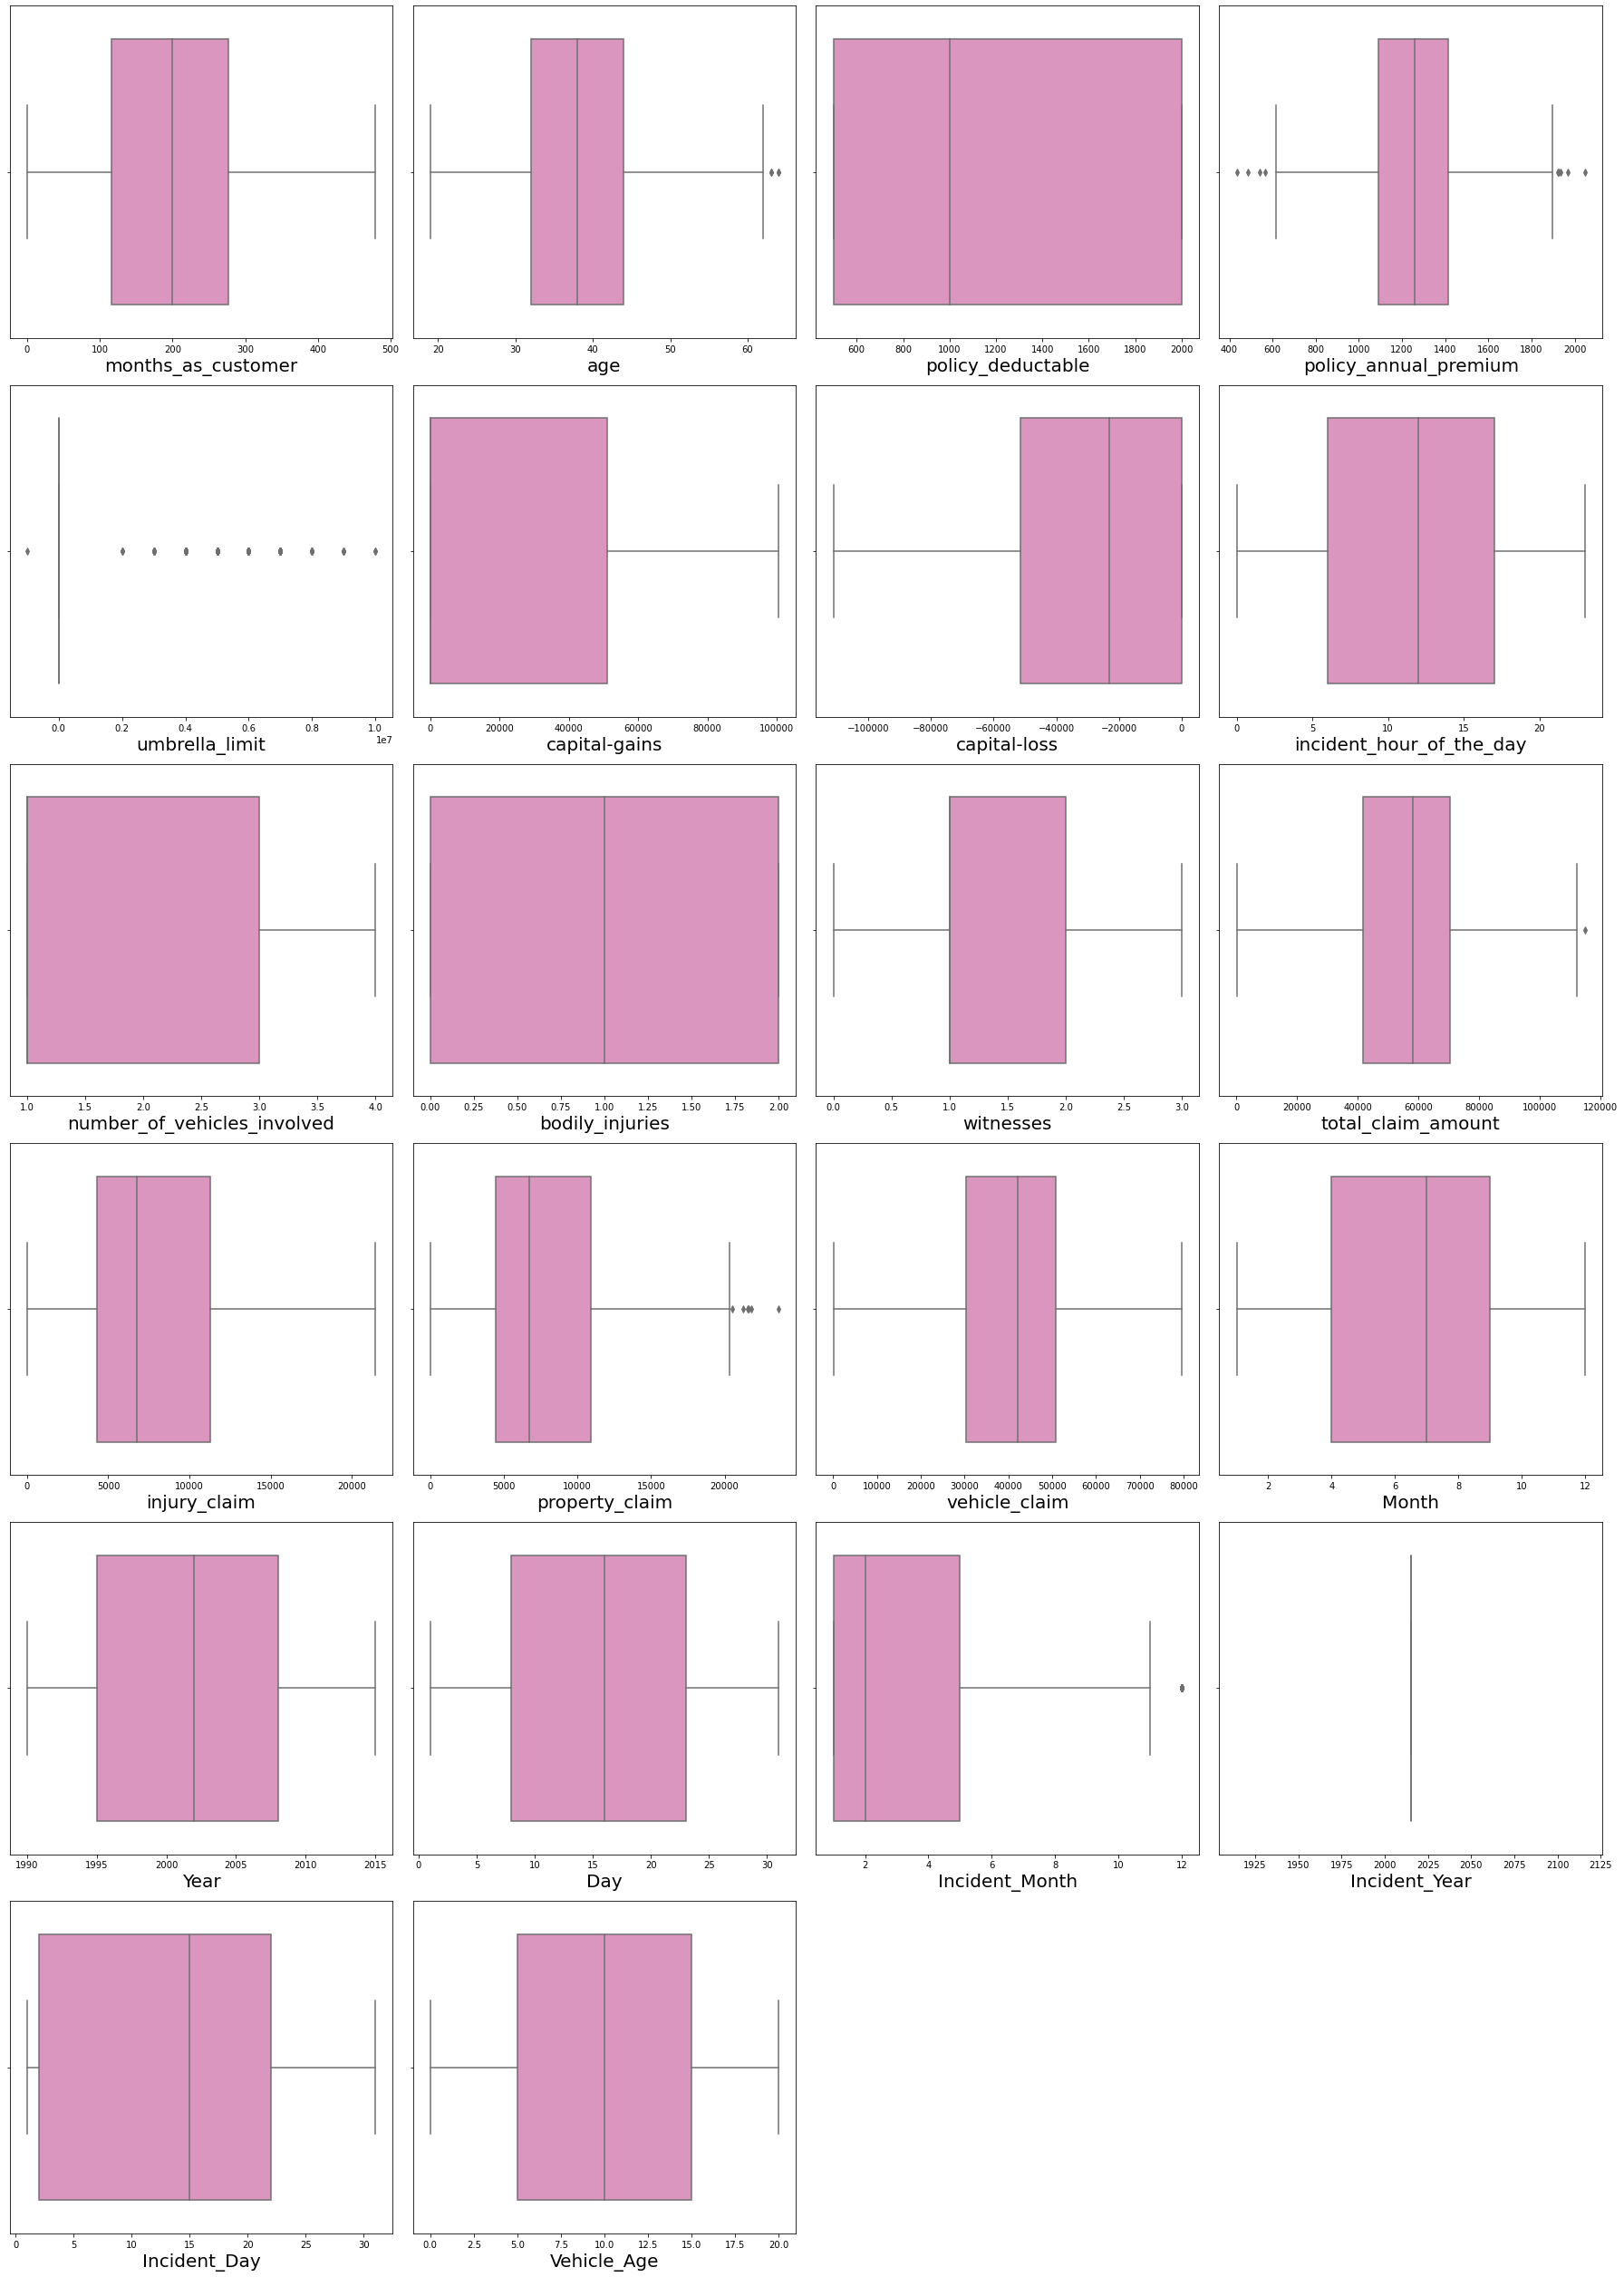

In [140]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column],palette="Set2_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can find the outliers in the following columns:

 - age
 - umbrella_limit
 - policy_annual_premium
 - total_claim_amount
 - property_claim
 - incident_month

These are the numerical columns which contains outliers. Let's remove outliers in these columns using zscore method

# Removing outliers

In [157]:
# Feature containing outliers
features = data[['age','policy_annual_premium','total_claim_amount','property_claim','Incident_Month','umbrella_limit']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

age  policy_annual_premium  total_claim_amount  property_claim  \
0    0.990836               0.616705            0.714257        1.165505   
1    0.334073               0.242521            1.807312        1.372696   
2    1.088913               0.642233            0.686362        0.736072   
3    0.224613               0.652886            0.403135        0.219722   
4    0.552994               1.341980            1.753121        1.399654   
..        ...                    ...                 ...             ...   
995  0.103769               0.222884            1.305049        0.273817   
996  0.224613               0.739141            2.111466        2.214794   
997  0.541611               0.520739            0.558507        0.020826   
998  2.523284               0.411866            0.219110        0.451976   
999  2.304363               2.008710            1.807691        1.343664   

     Incident_Month  umbrella_limit  
0          0.735040        0.479476  
1          0.735040        1.697980  
2          0.429664        1.697980  
3          2.013343        2.133471  
4          0.429664        2.133471  
..              ...             ...  
995        0.429664        0.479476  
996        0.735040        0.479476  
997        0.735040        0.826998  
998        0.429664        1.697980  
999        0.429664        0.479476  

[1000 rows x 6 columns]

In [173]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation  ... vehicle_claim   auto_make  \
0                        MD       craft-repair  ...         52080        Saab   
1                        MD  machine-op-inspct  ...          3510    Mercedes   
2                       PhD              sales  ...         23100       Dodge   
3                       PhD       armed-forces  ...         50720   Chevrolet   
4                 Associate              sales  ...          4550      Accura   
..                      ...                ...  ...           ...         ...   
995                 Masters       craft-repair  ...         61040       Honda   
996                     PhD     prof-specialty  ...         72320  Volkswagen   
997                 Masters       armed-forces  ...         52500      Suburu   
998               Associate  handlers-cleaners  ...         36540        Audi   
999               Associate              sales  ...          3680    Mercedes   

     auto_model  fraud_reported Month  Year Day Incident_Month Incident_Day  \
0           92x               Y    10  2014  17              1           25   
1          E400               Y     6  2006  27              1           21   
2           RAM               N     6  2000   9              2           22   
3         Tahoe               Y     5  1990  25             10            1   
4           RSX               N     6  2014   6              2           17   
..          ...             ...   ...   ...  ..            ...          ...   
995      Accord               N     7  1991  16              2           22   
996      Passat               N     5  2014   1              1           24   
997     Impreza               N     2  2003  17              1           23   
998          A5               N    11  2011  18              2           26   
999        E400               N    11  1996  11              2           26   

    Vehicle_Age  
0            11  
1             8  
2             8  
3             1  
4             6  
..          ...  
995           9  
996           0  
997          19  
998          17  
999           8  

[981 rows x 39 columns]

In [159]:
# Total Data Loss 
dataloss=(1000-981)/1000
dataloss*100

1.9

Only 1.9% of data is lost. so we can proceed

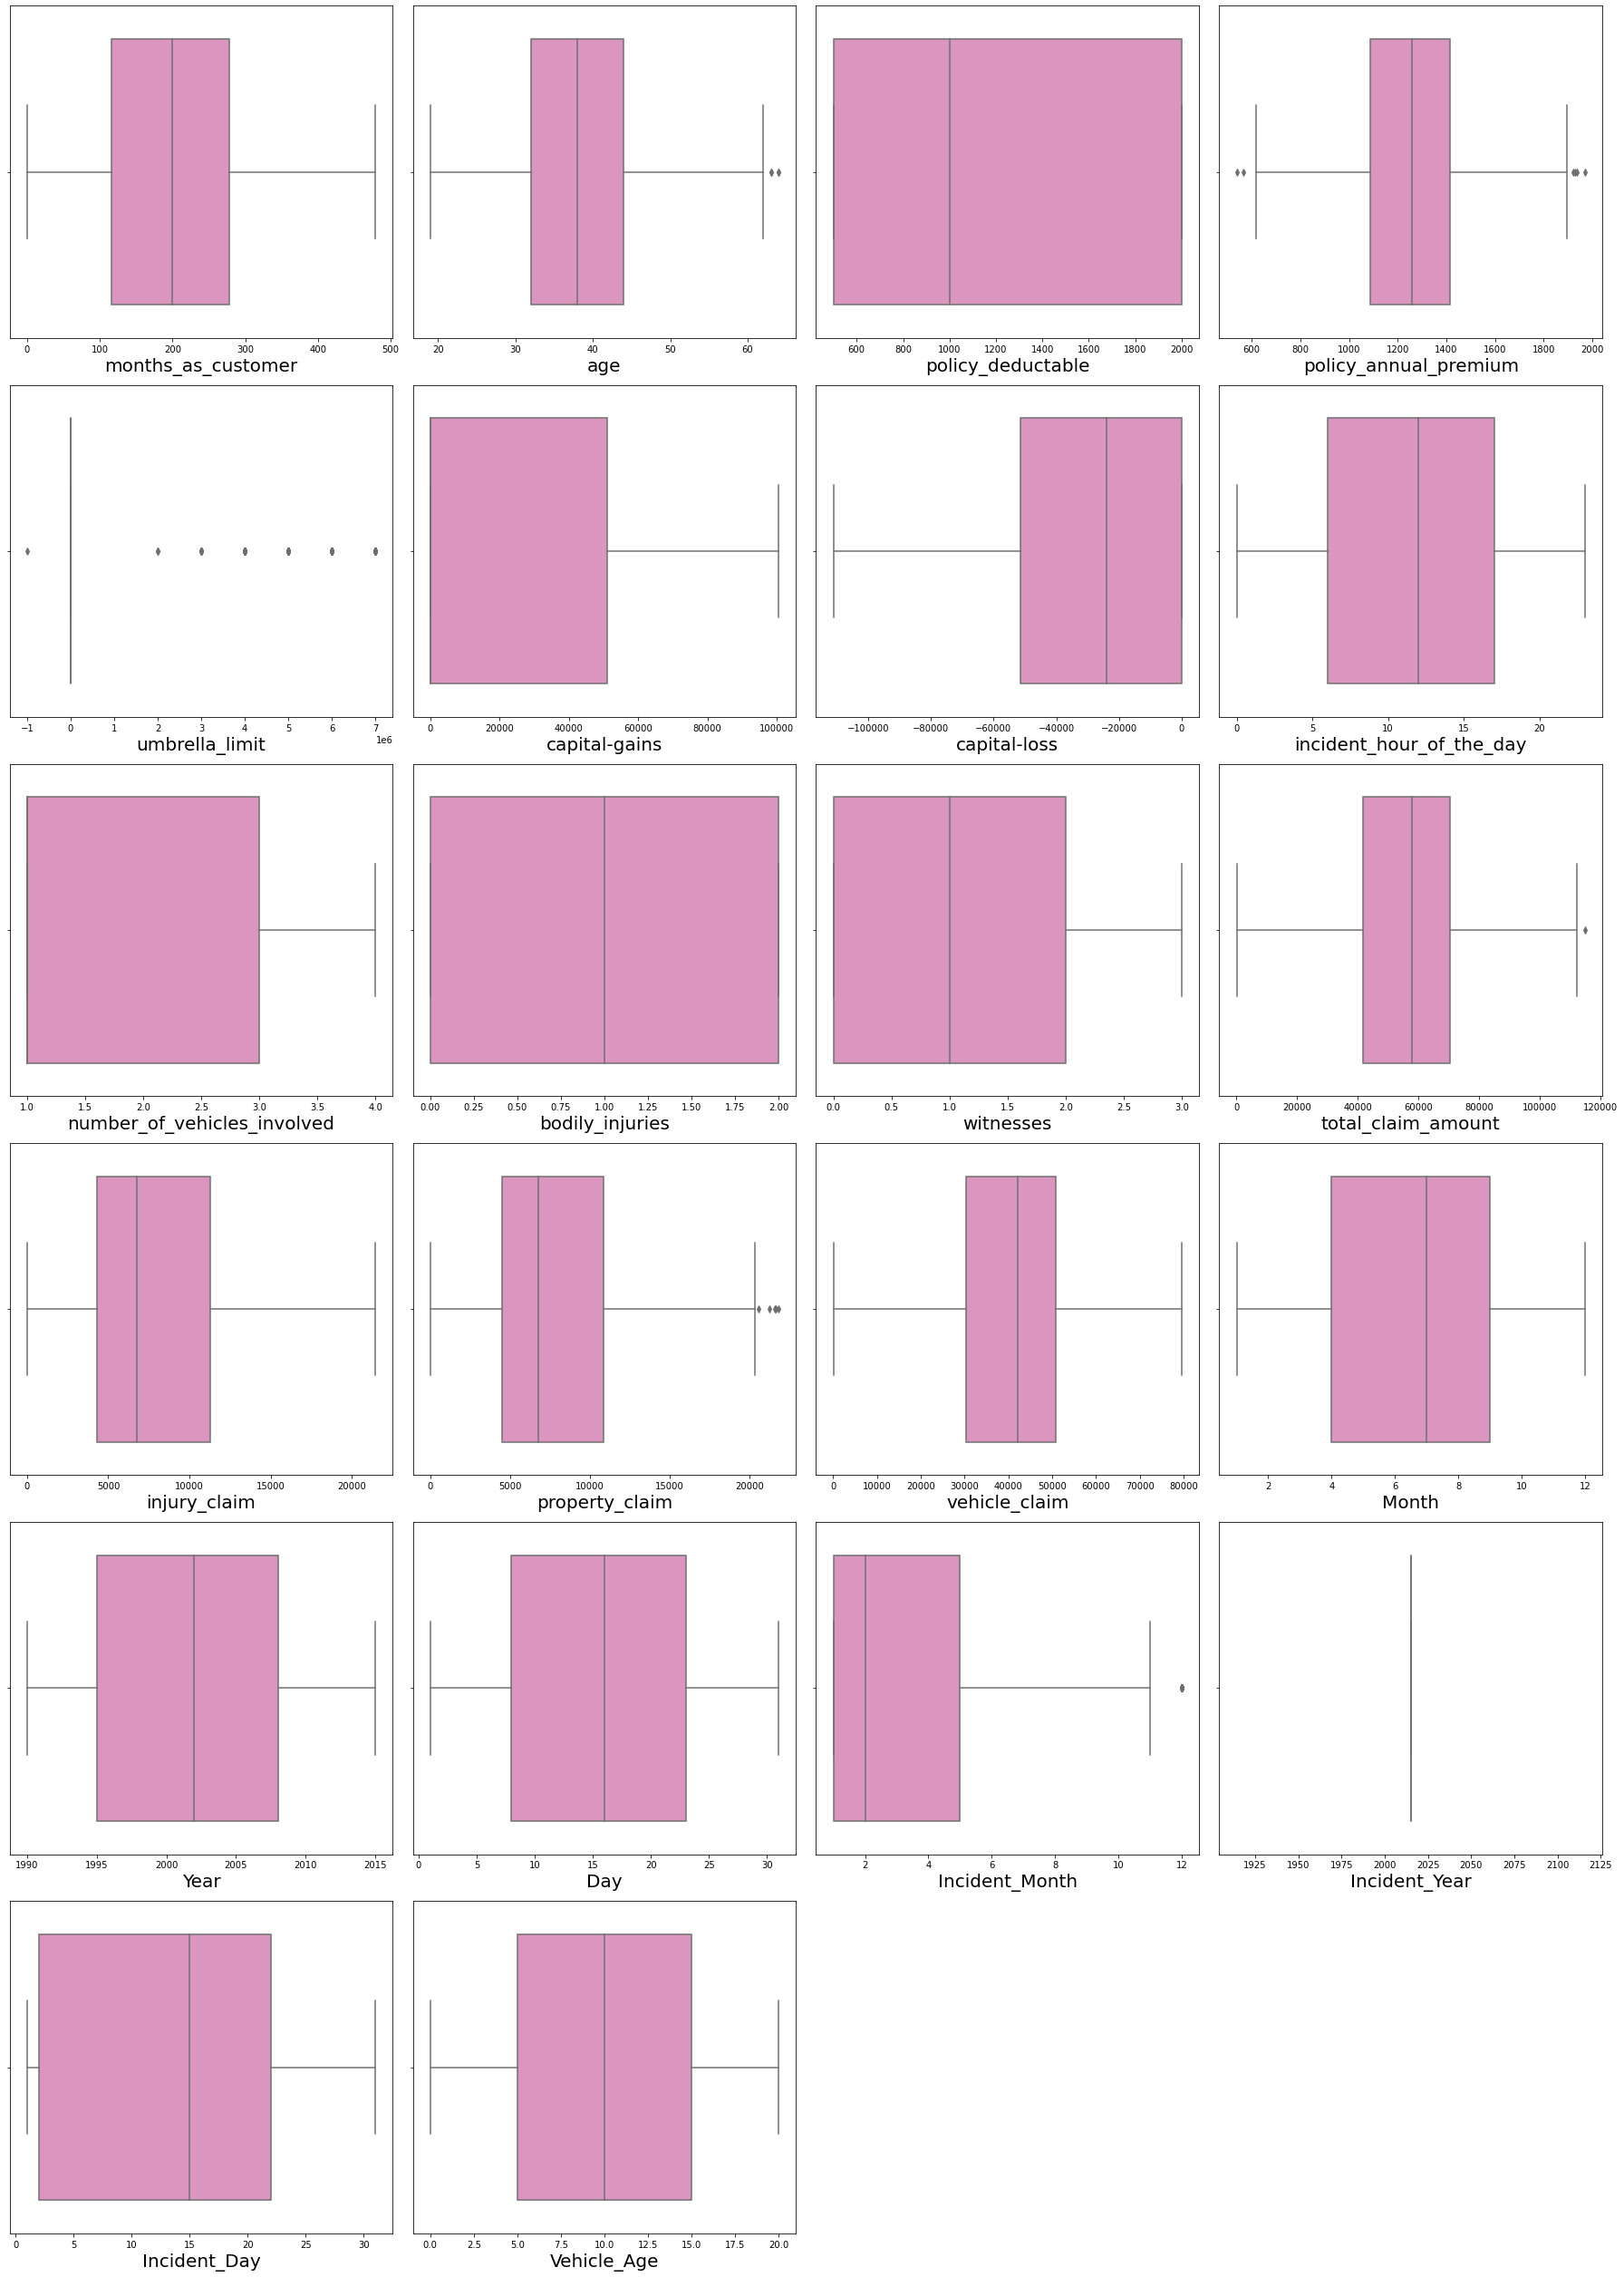

In [160]:
# Visualize the same
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We deleted maximum posiible out lier, now lets us continue

# Finding Skewness

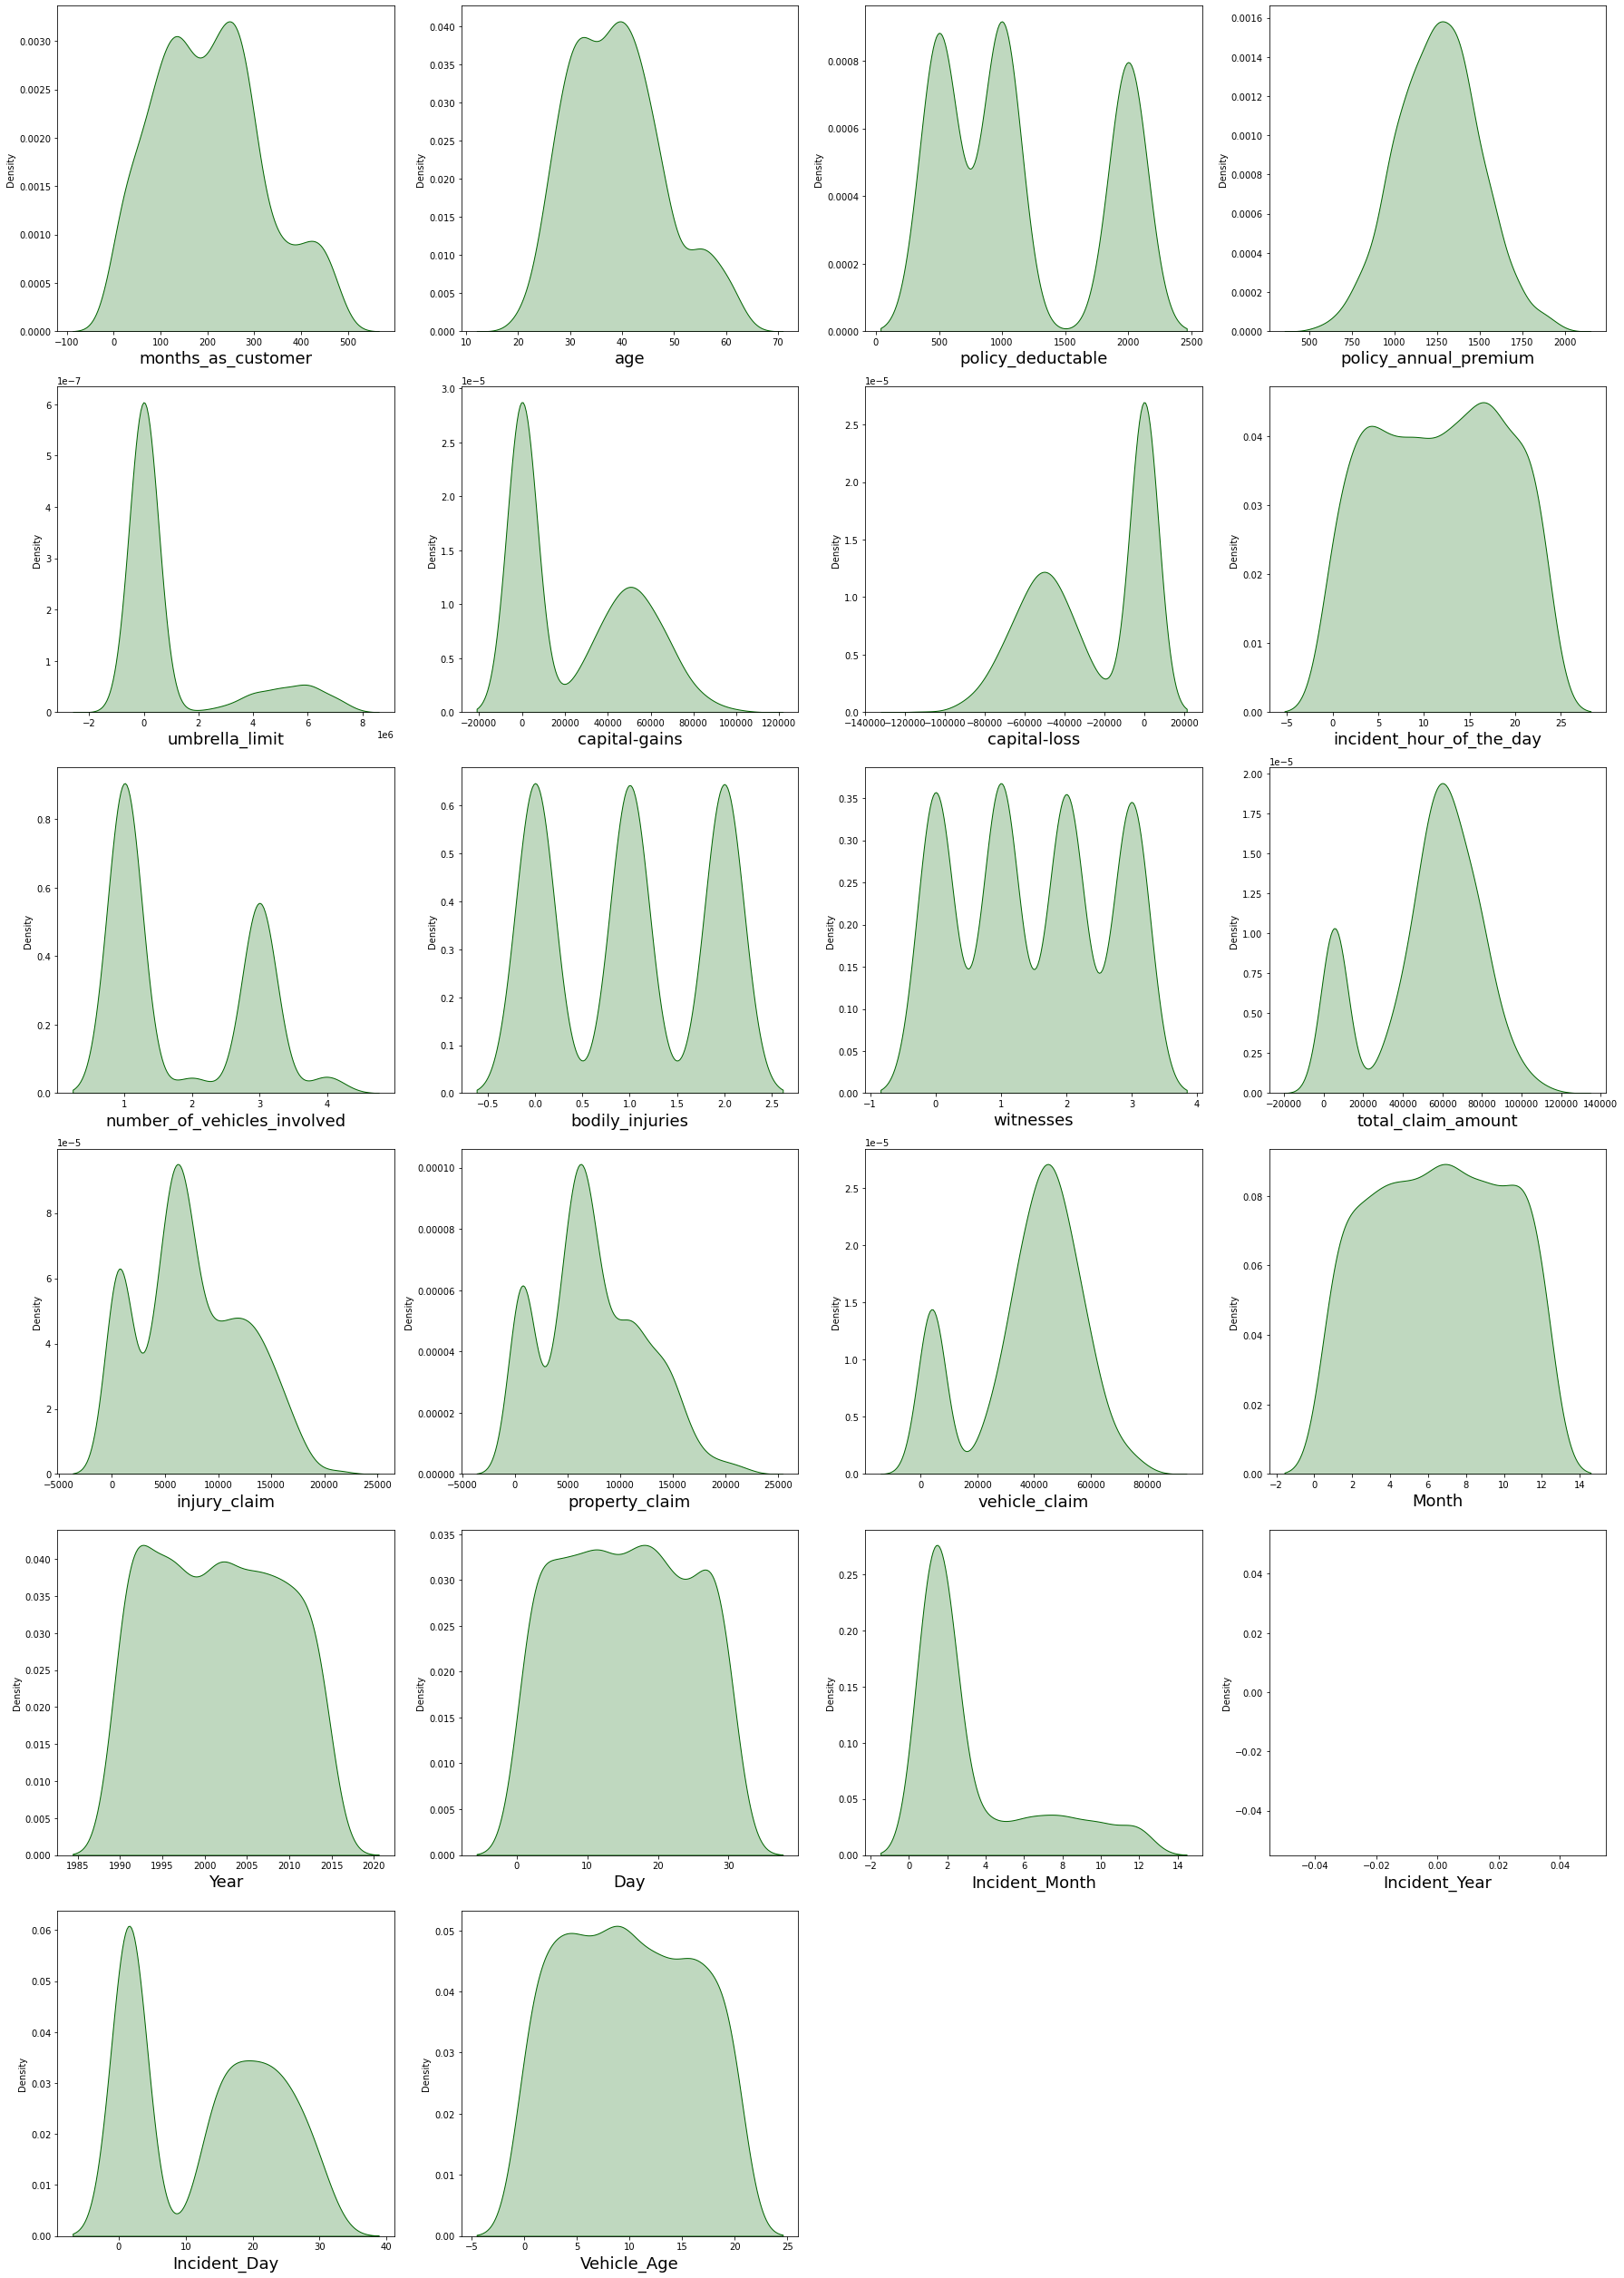

In [161]:
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(new_df[column],color="darkgreen",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

From this we can identfy that some features contains skewness, umbrella_limitIncident_month has maximum skewness, But we know that umbrella limit maximuM numbers are 0, so we canot remove all skewness from our THIS FEATURE

In [175]:
#Now Check skewness using skew
new_df.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
Month                         -0.025056
Year                           0.062986
Day                            0.026657
Incident_Month                 1.389884
Incident_Day                   0.057403
Vehicle_Age                    0.054033
dtype: float64

# Removing Skewness using yeo-johnson method

In [176]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ["total_claim_amount","vehicle_claim","Incident_Month"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

total_claim_amount  vehicle_claim  Incident_Month
0            0.719485       0.757816       -1.101290
1           -1.778833      -1.788203       -1.101290
2           -0.717305      -0.821553       -0.021758
3            0.394103       0.681441        1.557856
4           -1.731679      -1.741666       -0.021758

In [177]:
# Checking skewness after using yeo-johnson ethod
new_df[skew].skew()

total_claim_amount   -0.508980
vehicle_claim        -0.522130
Incident_Month        0.306126
dtype: float64

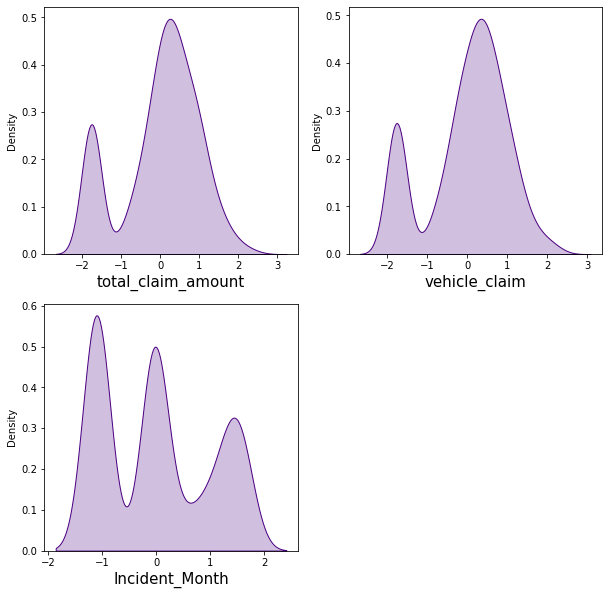

In [178]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

The data looks almost normal after removing the skewness compared to the previous data.

# Encoding the categorical columns using Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

Encoded the categorical columns using label encoder.

In [181]:
new_df[categorical_col].head()

policy_state  policy_csl  insured_sex  insured_education_level  \
0             2           1            1                        4   
1             1           1            1                        4   
2             2           0            0                        6   
3             0           1            0                        6   
4             0           2            1                        0   

   insured_occupation  insured_hobbies  insured_relationship  incident_type  \
0                   2               17                     0              2   
1                   6               15                     2              3   
2                  11                2                     3              0   
3                   1                2                     4              2   
4                  11                2                     4              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      4               4   
1               1                  1                      4               5   
2               1                  1                      4               1   
3               0                  0                      4               2   
4               1                  1                      2               1   

   incident_city  property_damage  police_report_available  auto_make  \
0              1                1                        1         10   
1              5                0                        0          8   
2              1                0                        0          4   
3              0                0                        0          3   
4              0                0                        0          0   

   auto_model  fraud_reported  
0           1               1  
1          12               1  
2          30               0  
3          34               1  
4          31               0

# Correlation between the target variable and independent variables using HEAT map

In [183]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922960     -0.007179   
age                                    0.922960  1.000000     -0.020009   
policy_state                          -0.007179 -0.020009      1.000000   
policy_csl                            -0.021865 -0.013330      0.001651   
policy_deductable                      0.030777  0.031851      0.017559   
policy_annual_premium                 -0.003875  0.005290      0.015079   
umbrella_limit                         0.018288  0.013305     -0.010908   
insured_sex                            0.059770  0.073857     -0.017970   
insured_education_level               -0.000735  0.001645     -0.027173   
insured_occupation                     0.006786  0.014703     -0.025369   
insured_hobbies                       -0.089267 -0.079038     -0.039484   
insured_relationship                   0.071304  0.075993     -0.017075   
capital-gains                          0.007126 -0.004735      0.068431   
capital-loss                           0.023429  0.013125     -0.031703   
incident_type                         -0.016557 -0.026152      0.032381   
collision_type                        -0.073025 -0.076321      0.049962   
incident_severity                     -0.064059 -0.064373     -0.028347   
authorities_contacted                  0.013999  0.018575     -0.014597   
incident_state                         0.015973  0.012750      0.019472   
incident_city                         -0.006837 -0.006838     -0.002843   
incident_hour_of_the_day               0.066370  0.083785      0.021938   
number_of_vehicles_involved            0.011635  0.020254     -0.045513   
property_damage                       -0.000521 -0.008165     -0.013556   
bodily_injuries                       -0.007870 -0.012377      0.012057   
witnesses                              0.063289  0.056159      0.025779   
police_report_available               -0.017084 -0.018058      0.065318   
total_claim_amount                     0.059193  0.068347     -0.015077   
injury_claim                           0.064864  0.077002     -0.048189   
property_claim                         0.036471  0.062231     -0.006442   
vehicle_claim                          0.056256  0.059056     -0.006424   
auto_make                              0.049912  0.033873      0.010283   
auto_model                             0.005350  0.015456     -0.017956   
fraud_reported                         0.021375  0.013338      0.034595   
Month                                  0.004185  0.014477      0.073689   
Year                                  -0.042040 -0.031790     -0.003066   
Day                                    0.050537  0.052939     -0.000618   
Incident_Month                         0.015392  0.014692      0.027477   
Incident_Day                          -0.010356 -0.005724      0.016067   
Vehicle_Age                           -0.001145 -0.005767      0.001116   

                             policy_csl  policy_deductable  \
months_as_customer            -0.021865           0.030777   
age                           -0.013330           0.031851   
policy_state                   0.001651           0.017559   
policy_csl                     1.000000           0.009999   
policy_deductable              0.009999           1.000000   
policy_annual_premium          0.032677          -0.007754   
umbrella_limit                 0.013471           0.012783   
insured_sex                   -0.003467          -0.008308   
insured_education_level        0.008339           0.014117   
insured_occupation             0.016512          -0.052613   
insured_hobbies               -0.003728          -0.002614   
insured_relationship          -0.034523          -0.017619   
capital-gains                  0.009902           0.034437   
capital-loss                  -0.035630          -0.023815   
incident_type                  0.005102          -0.033806   
collision_type                 0.028

This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

<AxesSubplot:>

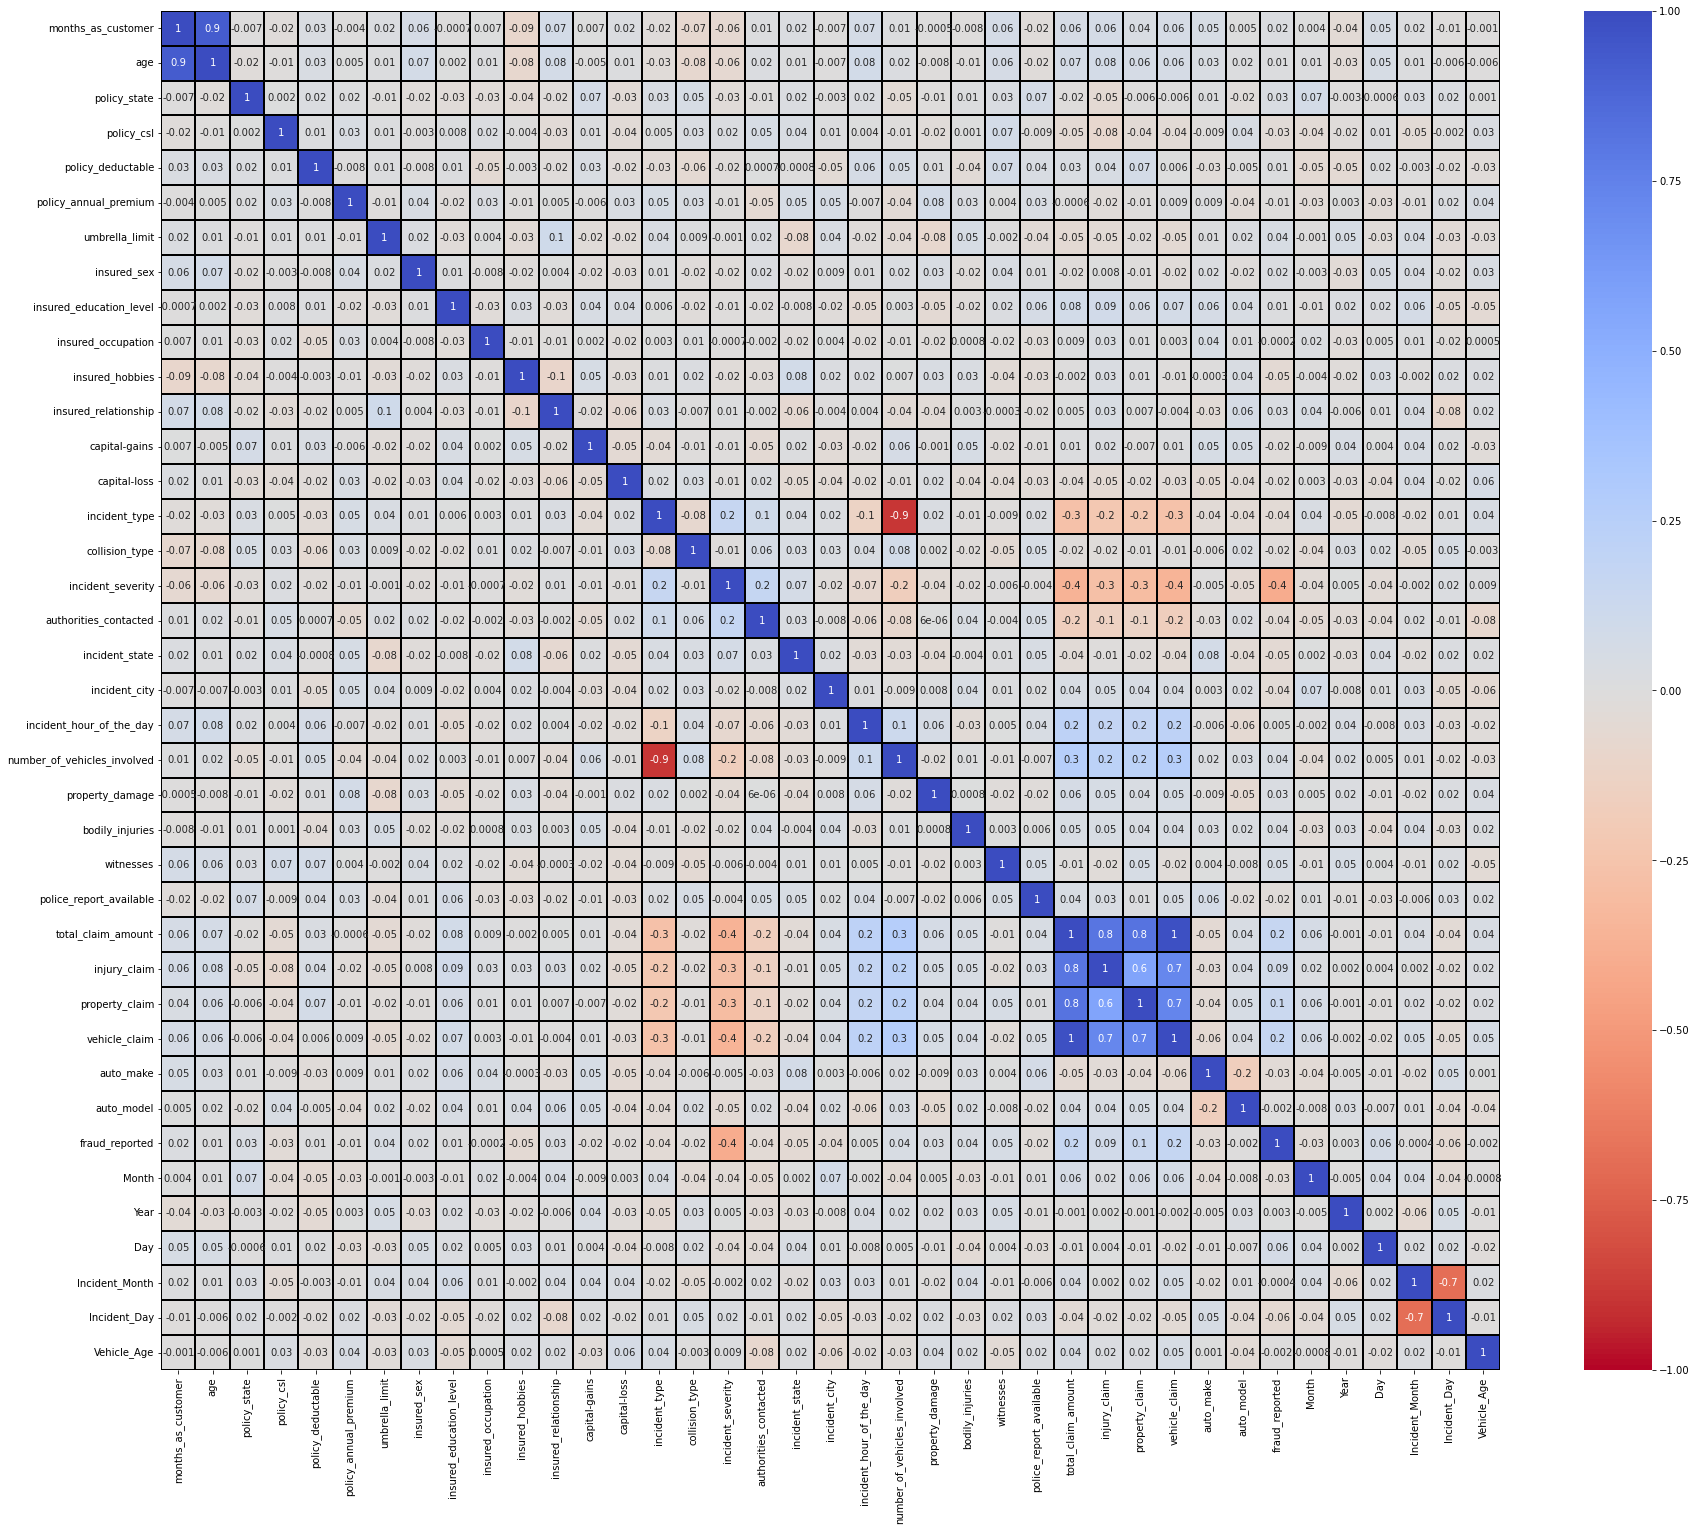

In [184]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="coolwarm_r")

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat map contains both positive and negative correlation values.

There is very less correlation between the target and the label.
We can observe the spme of the columns are highly correlated with each other which leads to the multicollinearity problem.
We will check the VIF value to overcome with this multicollinearity problem.


# Visualizing the correlation between label and features using bar plot

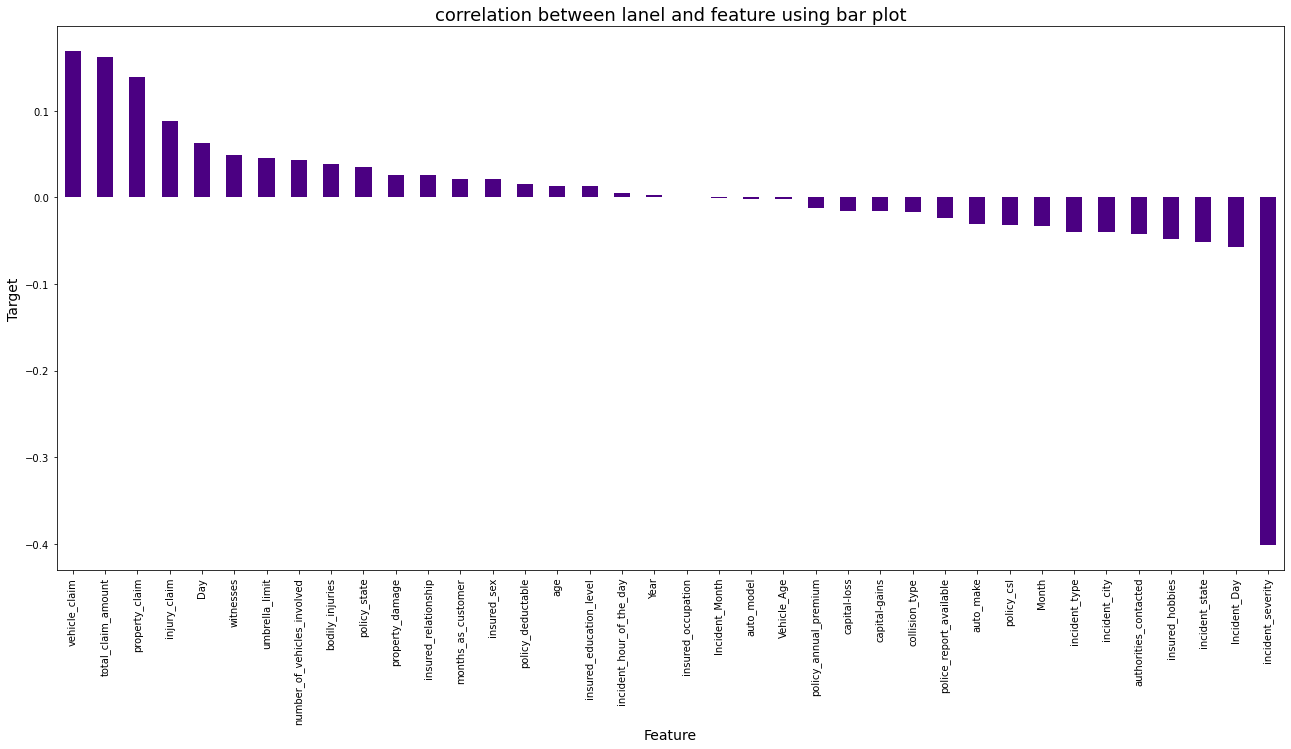

In [186]:
plt.figure(figsize=(22,10))
new_df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='indigo')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [195]:
# Feature Scaling using Standard Scalarization

In [196]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

months_as_customer       age  policy_state  policy_csl  policy_deductable  \
0            1.070264  0.983956      1.180447    0.067197          -0.225968   
1            0.202991  0.329985     -0.024567    0.067197           1.410009   
2           -0.612245 -1.086951      1.180447   -1.176582           1.410009   
3            0.445828  0.220990     -1.229581    0.067197           1.410009   
4            0.202991  0.547975     -1.229581    1.310976          -0.225968   

   policy_annual_premium  insured_sex  insured_education_level  \
0               0.619923     1.072994                 0.533151   
1              -0.248937     1.072994                 0.533151   
2               0.645737    -0.931972                 1.557678   
3               0.656510    -0.931972                 1.557678   
4               1.353331     1.072994                -1.515903   

   insured_occupation  insured_hobbies  ...  property_claim  vehicle_claim  \
0           -1.157117         1.276270  ...        1.174939       0.757816   
1           -0.161169         0.924628  ...       -1.379994      -1.788203   
2            1.083766        -1.361044  ...       -0.739173      -0.821553   
3           -1.406105        -1.361044  ...       -0.219420       0.681441   
4            1.083766        -1.361044  ...       -1.407130      -1.741666   

   auto_make  auto_model     Month      Year       Day  Incident_Month  \
0   0.852973   -1.638317  1.013847  1.682477  0.173153       -1.101290   
1   0.356523   -0.650052 -0.162827  0.599465  1.306330       -1.101290   
2  -0.636377    0.967110 -0.162827 -0.212794 -0.733389       -0.021758   
3  -0.884602    1.326479 -0.456996 -1.566559  1.079695        1.557856   
4  -1.629278    1.056952 -0.162827  1.682477 -1.073342       -0.021758   

   Incident_Day  Vehicle_Age  
0      1.143669     0.186701  
1      0.759608    -0.311903  
2      0.855623    -0.311903  
3     -1.160699    -1.475311  
4      0.375546    -0.644305  

[5 rows x 37 columns]

# Checking Variance Inflation Factor(VIF)

In [197]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values                     Features
0       6.909260           months_as_customer
1       6.921063                          age
2       1.036971                 policy_state
3       1.036069                   policy_csl
4       1.048402            policy_deductable
5       1.036886        policy_annual_premium
6       1.031103                  insured_sex
7       1.048218      insured_education_level
8       1.017451           insured_occupation
9       1.050304              insured_hobbies
10      1.048307         insured_relationship
11      1.041902                capital-gains
12      1.042730                 capital-loss
13      5.190465                incident_type
14      1.047641               collision_type
15      1.239840            incident_severity
16      1.107419        authorities_contacted
17      1.046666               incident_state
18      1.030922                incident_city
19      1.099847     incident_hour_of_the_day
20      5.168972  number_of_vehicles_involved
21      1.030908              property_damage
22      1.027020              bodily_injuries
23      1.044848                    witnesses
24      1.040550      police_report_available
25  41621.845236           total_claim_amount
26   1545.378471                 injury_claim
27   1492.059785               property_claim
28  20689.309429                vehicle_claim
29      1.079435                    auto_make
30      1.068862                   auto_model
31      1.039524                        Month
32      1.029737                         Year
33      1.025418                          Day
34      1.966007               Incident_Month
35      1.957077                 Incident_Day
36      1.040841                  Vehicle_Age

We can observe some columns have VIF above 10 that means they are causing multicollinearity problem.

* total_claim amount
* injury_claim
* property_claim
* vehicle_claim


Let's drop the feature having high VIF value amongst all the columns.



In [198]:
# Dropping total_claim_amount column as it contains high VIF value
x.drop(["total_claim_amount"],axis=1,inplace=True)

In [199]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

vif_Features                     Features
0       6.906758           months_as_customer
1       6.921027                          age
2       1.036950                 policy_state
3       1.035349                   policy_csl
4       1.046997            policy_deductable
5       1.036061        policy_annual_premium
6       1.028386                  insured_sex
7       1.048158      insured_education_level
8       1.016615           insured_occupation
9       1.048350              insured_hobbies
10      1.048303         insured_relationship
11      1.041891                capital-gains
12      1.042418                 capital-loss
13      5.182077                incident_type
14      1.047387               collision_type
15      1.194999            incident_severity
16      1.085349        authorities_contacted
17      1.042392               incident_state
18      1.029269                incident_city
19      1.093931     incident_hour_of_the_day
20      5.156273  number_of_vehicles_involved
21      1.030766              property_damage
22      1.024770              bodily_injuries
23      1.044791                    witnesses
24      1.039166      police_report_available
25      2.179805                 injury_claim
26      2.248233               property_claim
27      3.329765                vehicle_claim
28      1.075904                    auto_make
29      1.067795                   auto_model
30      1.039506                        Month
31      1.029460                         Year
32      1.025269                          Day
33      1.960338               Incident_Month
34      1.955873                 Incident_Day
35      1.040143                  Vehicle_Age

Now we are overcome with the multicollinearity issue as the VIF values are less than 10 in all the columns.

# Clearing-Oversampling
As we noticed Label values are not balanced

In [201]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [202]:
# Checking value count of target column
y.value_counts()

1    741
0    741
Name: fraud_reported, dtype: int64

# Modeling

In [203]:
#Finding best random state
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9146067415730337  on Random_state  85


We have got the best random state as 85 and maximum accuracy as 91.46

In [204]:
# Creating train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Classification Algorithms

In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# Random Forest Classifier

In [206]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)
rfc=accuracy_score(y_test, predRFC)
print(rfc)
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9011235955056179
[[194  20]
 [ 24 207]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       214
           1       0.91      0.90      0.90       231

    accuracy                           0.90       445
   macro avg       0.90      0.90      0.90       445
weighted avg       0.90      0.90      0.90       445



# The accuracy using Random Forest Classifier is 90.11%

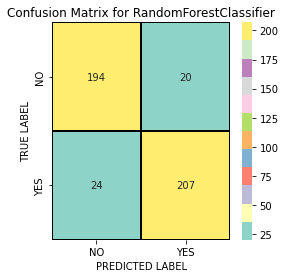

In [212]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Set3",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Support Vector Machine Classifier

In [208]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)
sv=accuracy_score(y_test, predsvc)
print(sv)
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8764044943820225
[[179  35]
 [ 20 211]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       214
           1       0.86      0.91      0.88       231

    accuracy                           0.88       445
   macro avg       0.88      0.87      0.88       445
weighted avg       0.88      0.88      0.88       445



# The accuracy score using Support Vector Machine classifier is 87.64%

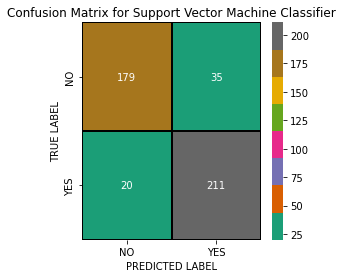

In [211]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Dark2",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# Gradient Boosting Classifier

In [210]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

gb=accuracy_score(y_test, predGB)
print(gb)
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.9011235955056179
[[192  22]
 [ 22 209]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       214
           1       0.90      0.90      0.90       231

    accuracy                           0.90       445
   macro avg       0.90      0.90      0.90       445
weighted avg       0.90      0.90      0.90       445



# The accuracy using Gradient Boosting Classifier is 90.11%.

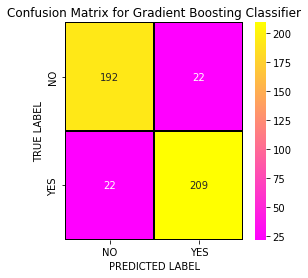

In [213]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# AdaBoost Classifier

In [214]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

abc=accuracy_score(y_test, predABC)
print(abc)
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.8561797752808988
[[188  26]
 [ 38 193]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       214
           1       0.88      0.84      0.86       231

    accuracy                           0.86       445
   macro avg       0.86      0.86      0.86       445
weighted avg       0.86      0.86      0.86       445



# The accuracy using AdaBoost Classifier is 85.62%.

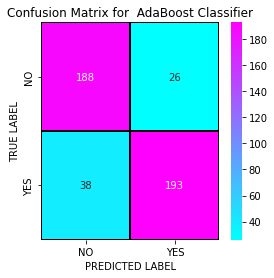

In [216]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="cool",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

# Bagging Classifier

In [218]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)

# Prediction
predBC = BC.predict(x_test)
bc=accuracy_score(y_test, predBC)
print(bc)
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test,predBC))

0.8853932584269663
[[193  21]
 [ 30 201]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       214
           1       0.91      0.87      0.89       231

    accuracy                           0.89       445
   macro avg       0.89      0.89      0.89       445
weighted avg       0.89      0.89      0.89       445



# The accuracy using Bagging classifier is 88.54%

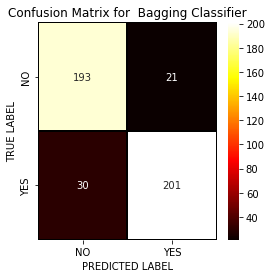

In [219]:
# Lets plot confusion matrix for  Bagging Classifier
cm = confusion_matrix(y_test,predBC)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="hot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Bagging Classifier')
plt.show()

# Extra Trees Classifier

In [220]:
# Checking accuracy for ExtraTreesClassifier
XT = ExtraTreesClassifier()
XT.fit(x_train,y_train)

# Prediction
predXT = XT.predict(x_test)

etc=accuracy_score(y_test, predXT)
print(etc)
print(confusion_matrix(y_test, predXT))
print(classification_report(y_test,predXT))

0.9123595505617977
[[189  25]
 [ 14 217]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       214
           1       0.90      0.94      0.92       231

    accuracy                           0.91       445
   macro avg       0.91      0.91      0.91       445
weighted avg       0.91      0.91      0.91       445



# The accuracy using Extra Trees Classifier is 91.23%

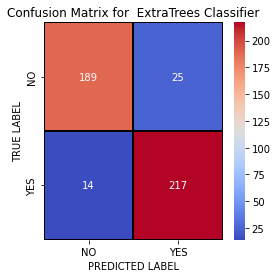

In [222]:
# Lets plot confusion matrix for  ExtraTreesClassifier
cm = confusion_matrix(y_test,predXT)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="coolwarm",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

# XGB Classifier

In [223]:
# Checking accuracy for XGBClassifier
XGB = xgb(verbosity=0)
XGB.fit(x_train,y_train)

# Prediction
predXGB = XGB.predict(x_test)
xgb1=accuracy_score(y_test, predXGB)
print(xgb1)
print(confusion_matrix(y_test, predXGB))
print(classification_report(y_test,predXGB))

0.9235955056179775
[[192  22]
 [ 12 219]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       214
           1       0.91      0.95      0.93       231

    accuracy                           0.92       445
   macro avg       0.92      0.92      0.92       445
weighted avg       0.92      0.92      0.92       445



# The accuracy using XGB classifier is 92.36%

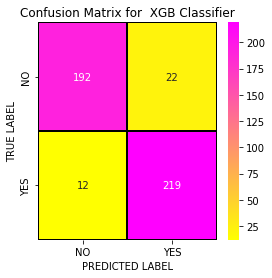

In [226]:
# Lets plot confusion matrix for  XGBClassifier
cm = confusion_matrix(y_test,predXGB)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

# Checking Cross Validation Score
For checking accuracy

In [237]:
# cv score for Random Forest Classifier
rf_cv=cross_val_score(RFC,x,y,cv=5).mean()
print(rf_cv)

0.8698857948857949


In [228]:
# cv score for Support Vector Machine Classifier
sv_cv=cross_val_score(svc,x,y,cv=5).mean()
print(sv_cv)

0.8698357448357449


In [229]:
# cv score for Gradient Boosting Classifier
gb_cv=cross_val_score(GB,x,y,cv=5).mean()
print(gb_cv)

0.8644553644553644


In [230]:
# cv score for AdaBoosting Classifier
ada_cv=cross_val_score(ABC,x,y,cv=5).mean()
print(ada_cv)

0.8409181909181909


In [231]:
# cv score for Bagging Classifier
bc_cv=cross_val_score(BC,x,y,cv=5).mean()
print(bc_cv)

0.8637705887705888


In [232]:
# cv score for Extra Trees Classifier
ex_cv=cross_val_score(XT,x,y,cv=5).mean()
print(ex_cv)

0.913019838019838


In [233]:
# cv score for XGB Classifier
xgb_cv=cross_val_score(XGB,x,y,cv=5).mean()
print(xgb_cv)

0.8732505232505232


In [238]:
# we can make a Data frame and find the differance between the accuracy score and cross validation score
model_list=['Random Forest Classifier','Support Vector Machine Classifier','Gradient Boosting Classifier','AdaBoosting Classifier','Bagging Classifier','Extra Trees Classifier','XGB Classifier']
accuracyscore=[rfc,sv,gb,abc,bc,etc,xgb1]
crossval=[rf_cv,sv_cv,gb_cv,ada_cv,bc_cv,ex_cv,xgb_cv]
score_diff=[]
for i in range(len(accuracyscore)):
    score_diff.append(accuracyscore[i]-crossval[i])

In [239]:
models=pd.DataFrame({})
models["Classifier"]=model_list
models["Accuracy_score"]=accuracyscore
models["Cross Validation_Score"]=crossval
models["Differance"]=score_diff
models

Classifier  Accuracy_score  Cross Validation_Score  \
0           Random Forest Classifier        0.901124                0.869886   
1  Support Vector Machine Classifier        0.876404                0.869836   
2       Gradient Boosting Classifier        0.901124                0.864455   
3             AdaBoosting Classifier        0.856180                0.840918   
4                 Bagging Classifier        0.885393                0.863771   
5             Extra Trees Classifier        0.912360                0.913020   
6                     XGB Classifier        0.923596                0.873251   

   Differance  
0    0.031238  
1    0.006569  
2    0.036668  
3    0.015262  
4    0.021623  
5   -0.000660  
6    0.050345

From the difference between the accuracy score and the cross validation score we can conclude that ExtraTrees Classifer as our best fitting model whch is giving very less difference compare to other models.

# Plotting ROC and compare AUC for all the models

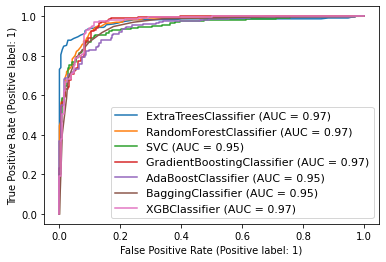

In [247]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(XT,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Hyper Parameter Tuning

In [240]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini','entropy'],
              'max_features':['aoto','sqrt','log2'],
              'max_depth' : [0, 5, 10],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 250]}# parameters that we are giving

In [241]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)# initializing

In [242]:
GCV.fit(x_train,y_train)# training our data

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 5, 10],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 250],
                         'n_jobs': [-2, -1, 1]})

In [243]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 250,
 'n_jobs': -2}

These are the best parameters values that we have got for ExtraTrees classifier.

In [244]:
FinalModel = ExtraTreesClassifier(criterion='gini', max_depth=20, max_features='log2', n_estimators=200, n_jobs=-2)
FinalModel.fit(x_train, y_train)
pred = FinalModel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.58426966292134


So the final Accuract of our model is 92.58%

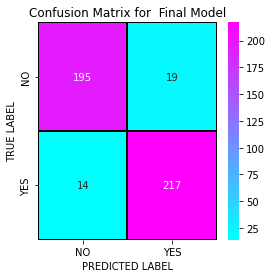

In [246]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="cool",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

# Plotting ROC and Compare AUC for the final tuned model

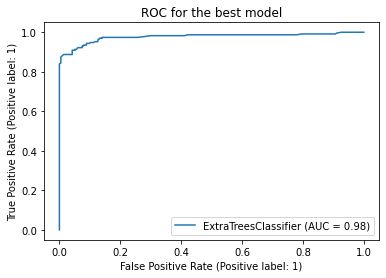

In [248]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(FinalModel, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Here we have plotted the ROC curve for the final model and the AUC value for the tuned model is 98%.

# Saving The Model

In [249]:
# Saving the model using .pkl
import joblib
joblib.dump(FinalModel,"InsuranceclaimFraudDetection.pkl")

['InsuranceclaimFraudDetection.pkl']

# Predicting the saved model

In [250]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("InsuranceclaimFraudDetection.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,

In [251]:
a=np.array(y_test)
result=pd.DataFrame({'Original':a,'Predicted':prediction})
result

Original  Predicted
0           1          0
1           0          0
2           1          1
3           1          1
4           1          1
..        ...        ...
440         1          1
441         0          0
442         1          1
443         1          1
444         1          1

[445 rows x 2 columns]

Here we can observe that actual and predicted fraud reports are almost same.

Concluding Remarks:-
* This project has built a model that can detect Vehicle insurance fraud. In doing so, the model can reduces loses for insurance companies.
